# <div styl.ipynb_checkpoints/="text-align: center"> Projet 3: NoteBook Nettoyage </div> 
<ins> *Michel Blazevic* </ins> 
<div style="text-align: justify">
 $\;\;\;\;\;\;$ <font color='gray'> Voici le notebook comportant le nettoyage de la base de données, comprenant la gestion des valeurs manquantes et le choix des colonnes pertinantes pour l'étude effectuée. </div>
    
<font color='gray'> Remarque: Parfois les cellules n'ont pas été exécuté dans l'ordre car je revenais en arrière ect.

 $\;\;\;\;\;\;$<font color='red'> On importe les librairies nécessaires pour l'étude pré-exploratoire et le nettoyage de la base de données. On charge également la base d'OpenFoodFact.

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
import missingno as msno

In [135]:
df=pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t',low_memory=False)

In [136]:
dftt=pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t',low_memory=False)

In [137]:
dftt[['nutrition-score-fr_100g','nutrition_grade_fr']].isna().mean()

nutrition-score-fr_100g    0.310382
nutrition_grade_fr         0.310382
dtype: float64

In [284]:
dftt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [138]:
for k in df[df['main_category_fr']=='plat préparé']['generic_name']:
    print(k)

In [139]:
for k in df[df['main_category_fr']=='Plats préparés']['generic_name'].dropna():
    print(k)

Quiche lorraine
Pâte à pizza cuite sur pierre recouverte de sauce tomate, de fromages mozzarella et ricotta, d'épinards et de tomates Santarella
Bœuf haché, sauce tomate et pâte superposés, recouverts de sauce béchamel et de fromage.
Pizza
Chick peas in curry sauce
Kraft Dinner Original
Smoked Salmon and Broccoli Quiche
Produit de boulange
Pâtes aux œufs de poules élevées en plein air dans une sauce onctueuse avec du jambon effiloché fumé au bois de hêtre et des champignons marinés rôtis
Chou chinois (pe-tsaï) lacto-fermenté et piments
Cajun Chicken & Smoked Ham Jambalaya
Plat préparé indien à base d'agneau, de crème et d'une sauce aux oignons.
Bœuf Aberdeen Angus, chutney d'oignon rouge et moutarde sur du pain à l'anglaise à l'oignon.
Choucroute garnie à partager
Pizza
Gratin de pomme de terre façon méditerranéene
Carottes rapées
Pâte à pizza recouverte de sauce tomate, de fromage mozzarella, de poivrons jaunes cuits au gril, de courgettes cuites au gril, de tomates cerise rouges Sant

In [140]:
for k in dftt.columns: print(k)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
butyr

In [141]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
dftt

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## $\Rightarrow$ <ins>Partie 1</ins>:  Première observation sur la base de données

### $\to$ Etude générale Dataset
<font color='gray'> On essaye la librairie missingno 

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


<AxesSubplot:>

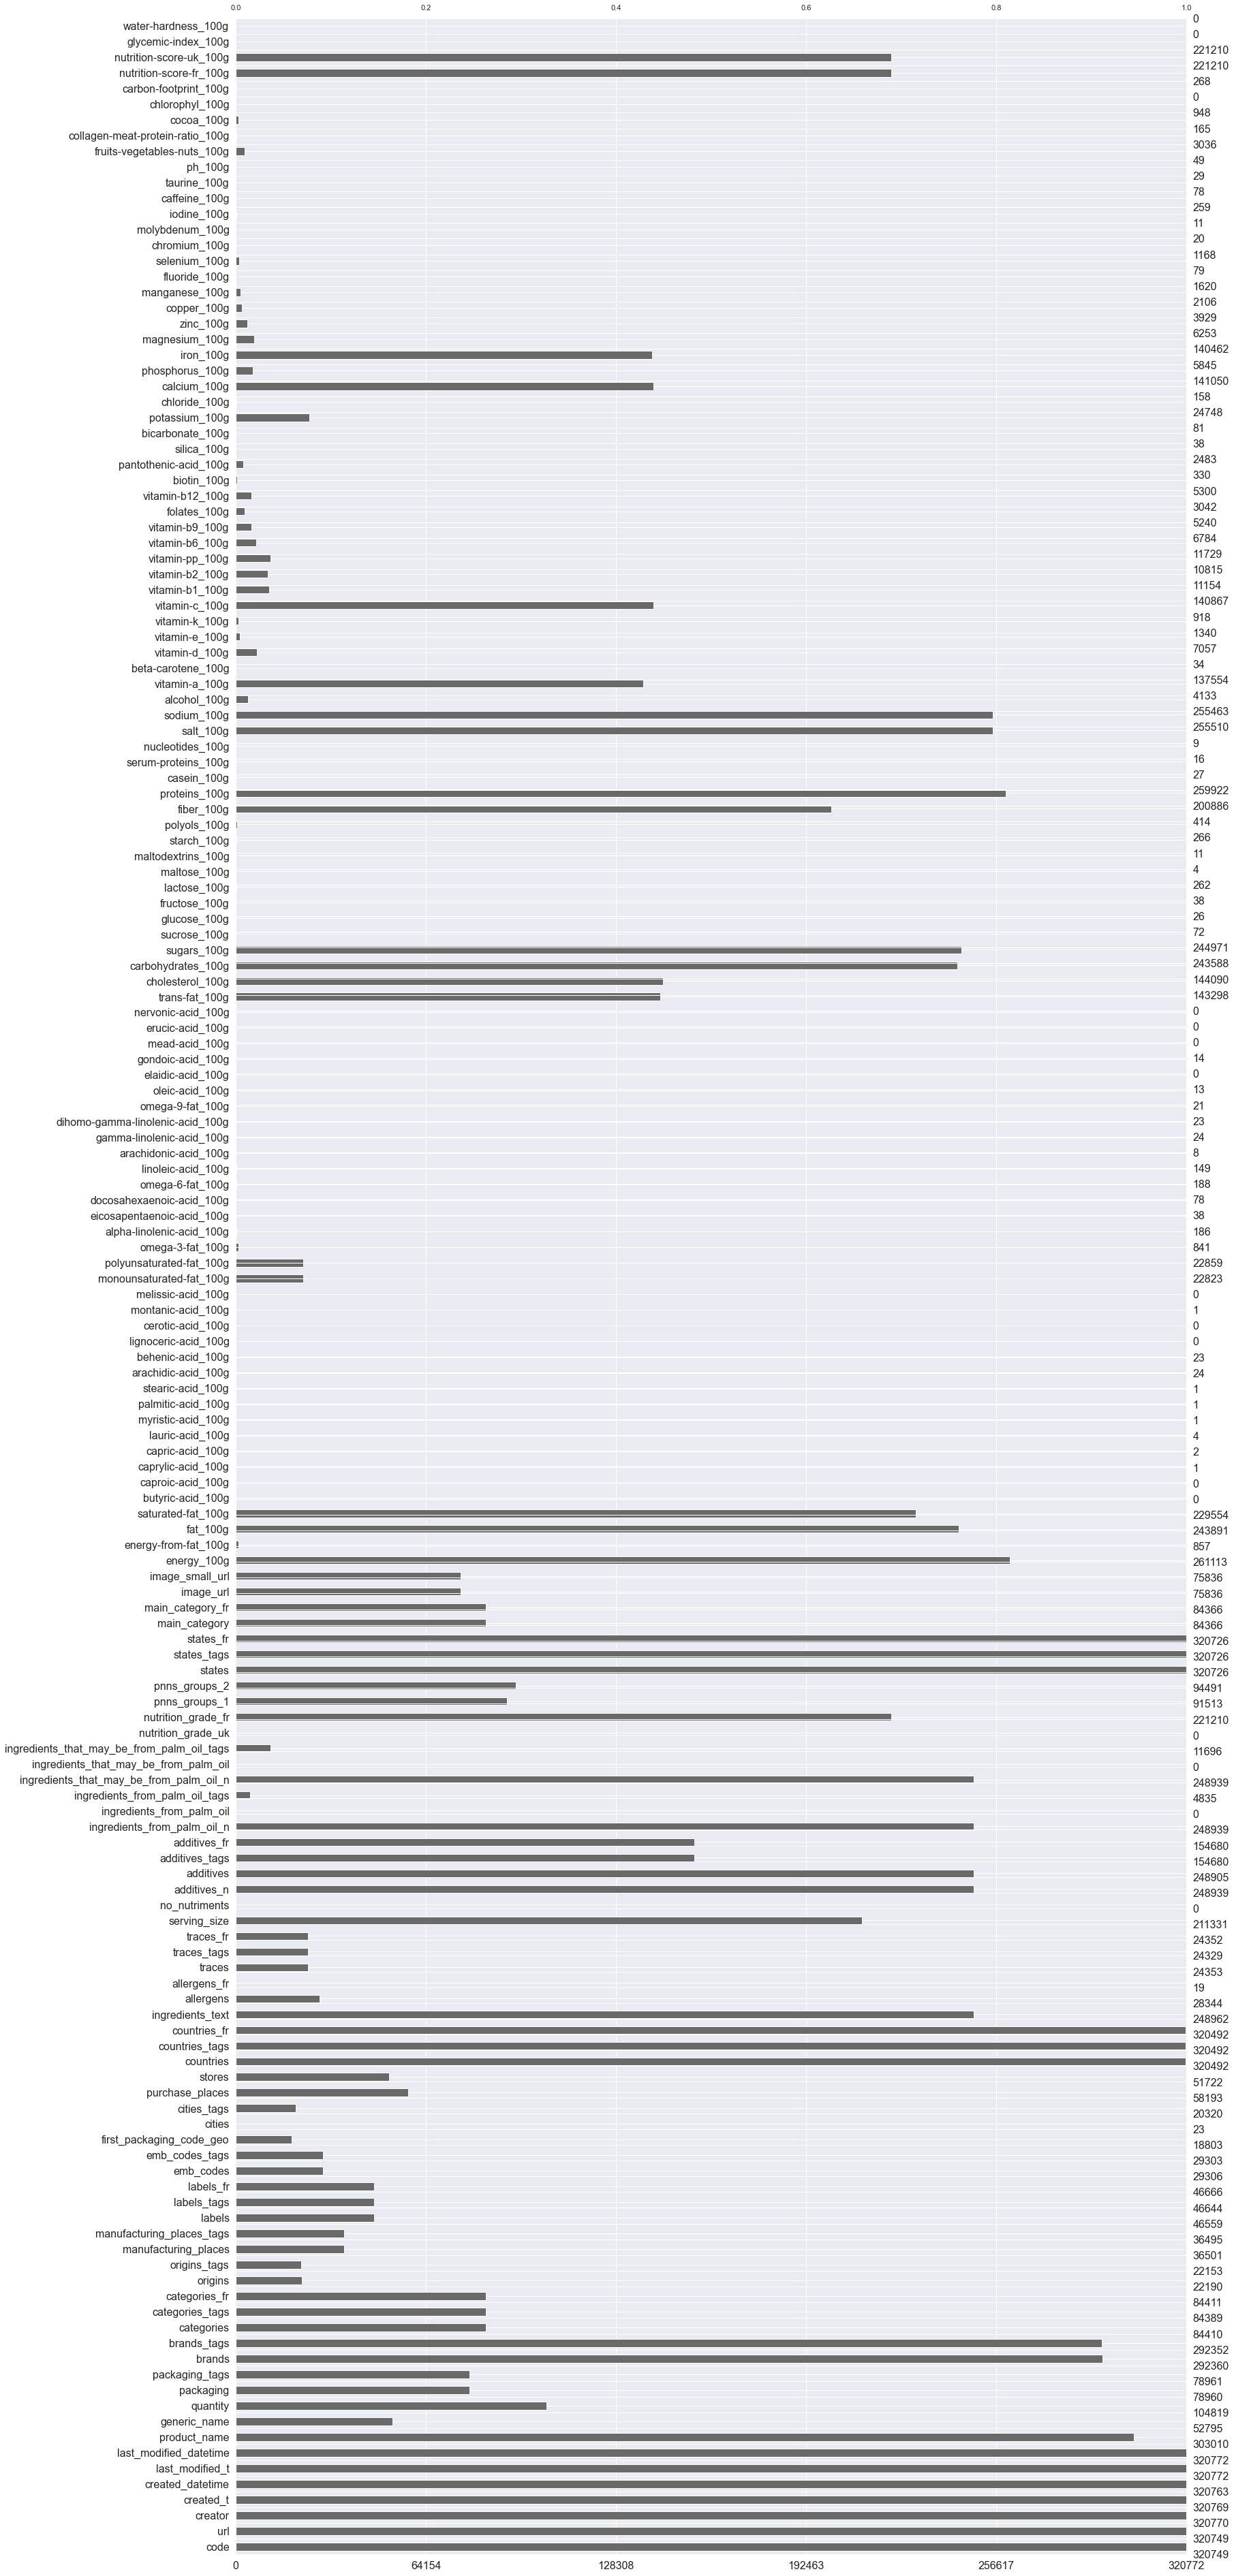

In [144]:
msno.bar(df)

In [289]:
labs=
labs[0]=labs[0]+': '+str(pd.Series(df.dtypes.value_counts()).values[0])
labs[1]=labs[1]+': '+str(pd.Series(df.dtypes.value_counts()).values[1])

In [309]:
def pie_types_variable(d,name=''):
    (d.dtypes.value_counts()).plot.pie(autopct='%1.1f%%',startangle=0)
    plt.title('Pieplot des types de variables dans la bdd',name)
    plt.ylabel('')
    plt.show()

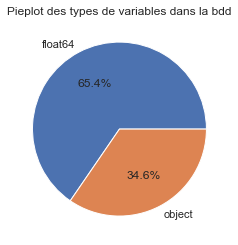

In [310]:
pie_types_variable(dftt)

Text(0, 0.5, '')

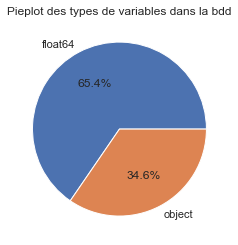

In [308]:
(dftt.dtypes.value_counts()).plot.pie(autopct='%1.1f%%')
plt.title('Pieplot des types de variables dans la bdd')
plt.ylabel('')

In [292]:
labs=pd.Series(df.dtypes.unique()).apply(lambda x: x.name).values
labs

array(['object', 'float64'], dtype=object)

Text(0, 0.5, '')

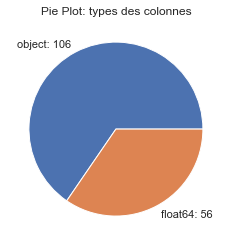

In [146]:
#plt.figure(facecolor='white')
df.dtypes.value_counts().plot.pie(labels=labs)
plt.title('Pie Plot: types des colonnes')
plt.ylabel('')

<font color='gray'> On dispose de 106 colonnes contenant des objets de types str ou autres et 56 de nombres floattants

In [147]:
def desc_df(df):
    val_manq=df.notna().mean().mean()
    dupli=df.duplicated().sum()
    nbligne=len(df.index)
    nbcolonne=len(df.columns)
    print("Dans la base de données d'open food fact, on a {} lignes avec {} variables. Elle est remplie à {} % et il y a {} lignes dupliquées".format(nbligne,nbcolonne,str(val_manq*100)[:5],dupli))

In [148]:
desc_df(df)

Dans la base de données d'open food fact, on a 320772 lignes avec 162 variables. Elle est remplie à 23.77 % et il y a 0 lignes dupliquées


In [149]:
dfval=pd.DataFrame([df.notna().mean().mean(),df.isna().mean().mean()],index=['Remplissage: '+str(df.notna().mean().mean())[:4],'Valeurs manquantes: '+str(df.isna().mean().mean())[:4]])

In [150]:
dfval

,0
Remplissage: 0.23,0.237784
Valeurs manquantes: 0.76,0.762216


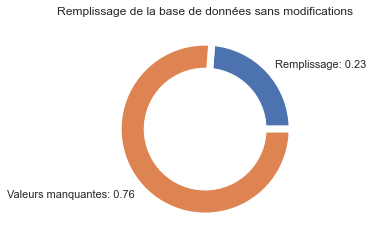

In [151]:
#plt.figure(facecolor='white')
names = dfval.index.values.reshape(2,)
size = dfval.values.reshape(2,)
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Remplissage de la base de données sans modifications')
plt.show()

In [152]:
df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


(None,
        no_nutriments    additives_n  ingredients_from_palm_oil_n  \
 count            0.0  248939.000000                248939.000000   
 mean             NaN       1.936024                     0.019659   
 std              NaN       2.502019                     0.140524   
 min              NaN       0.000000                     0.000000   
 25%              NaN       0.000000                     0.000000   
 50%              NaN       1.000000                     0.000000   
 75%              NaN       3.000000                     0.000000   
 max              NaN      31.000000                     2.000000   
 
        ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
 count                        0.0                            248939.000000   
 mean                         NaN                                 0.055246   
 std                          NaN                                 0.269207   
 min                          NaN                         

<font color='gray'> On peut voir plus précisement les remplissages par variables afin de faire un premier tri.

Text(0.5, 1.0, 'Bar plot du taux de valeurs manquantes par variable')

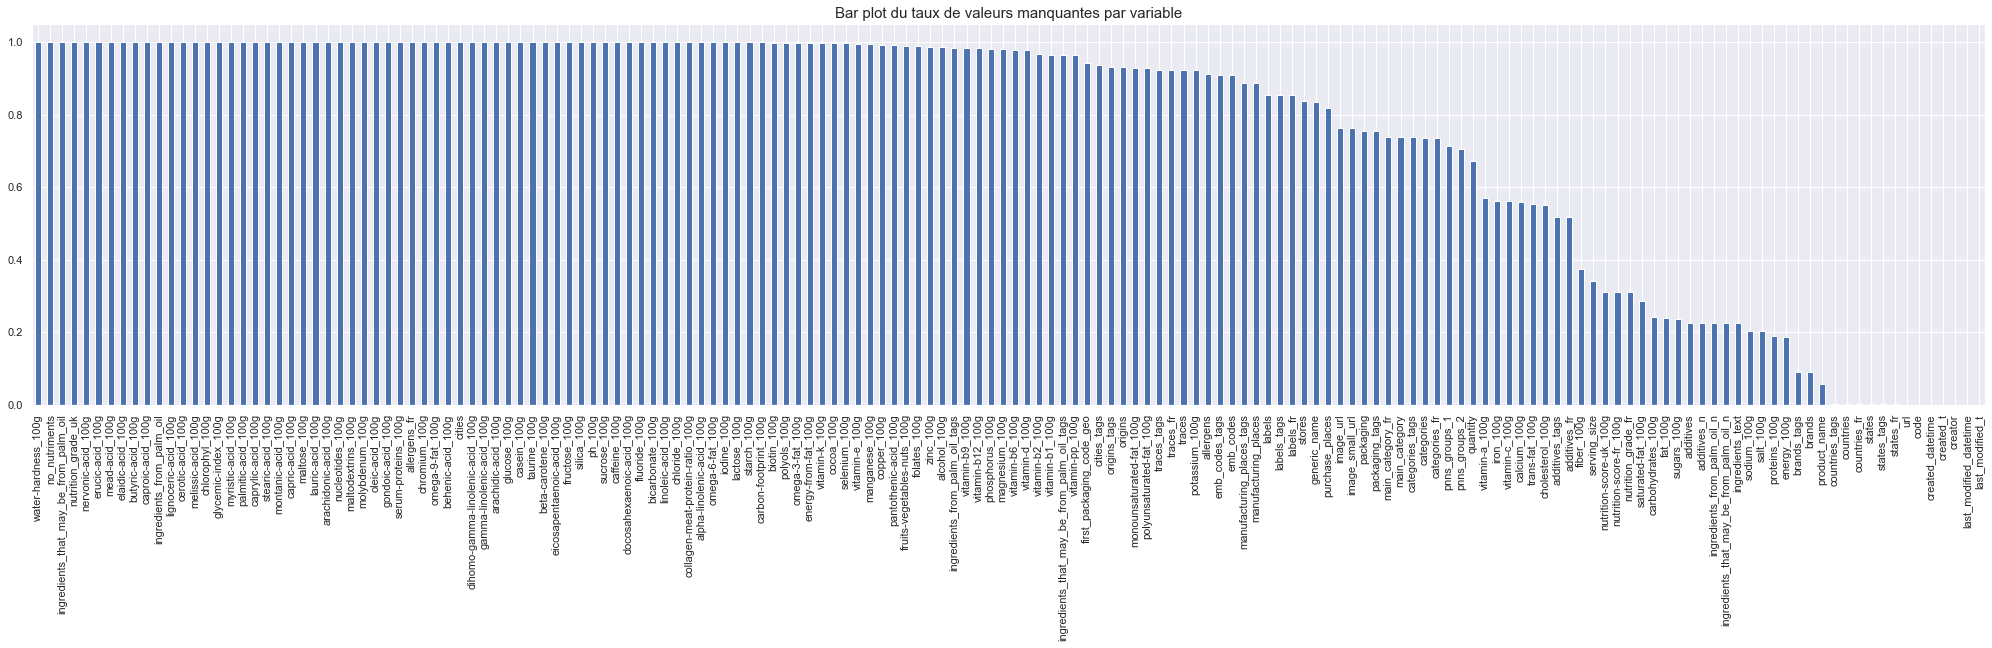

In [153]:
(df.isna().mean().sort_values(ascending=False)).plot.bar(figsize=(35,7))
plt.title('Bar plot du taux de valeurs manquantes par variable',fontsize=15)

<font color='gray'> On observe qu'il y a beaucoup de variable avec un taux de valeurs manquantes très élevé. On peut alors éliminer toutes ces variables. 

In [154]:
(df.isna().mean().sort_values(ascending=False)==1).value_counts()

False    146
True      16
dtype: int64

In [155]:
lst_suppr=df.isna().mean().sort_values(ascending=False)[(df.isna().mean().sort_values(ascending=False)==1)].index.values
df.drop(lst_suppr,axis=1,inplace=True)

<AxesSubplot:>

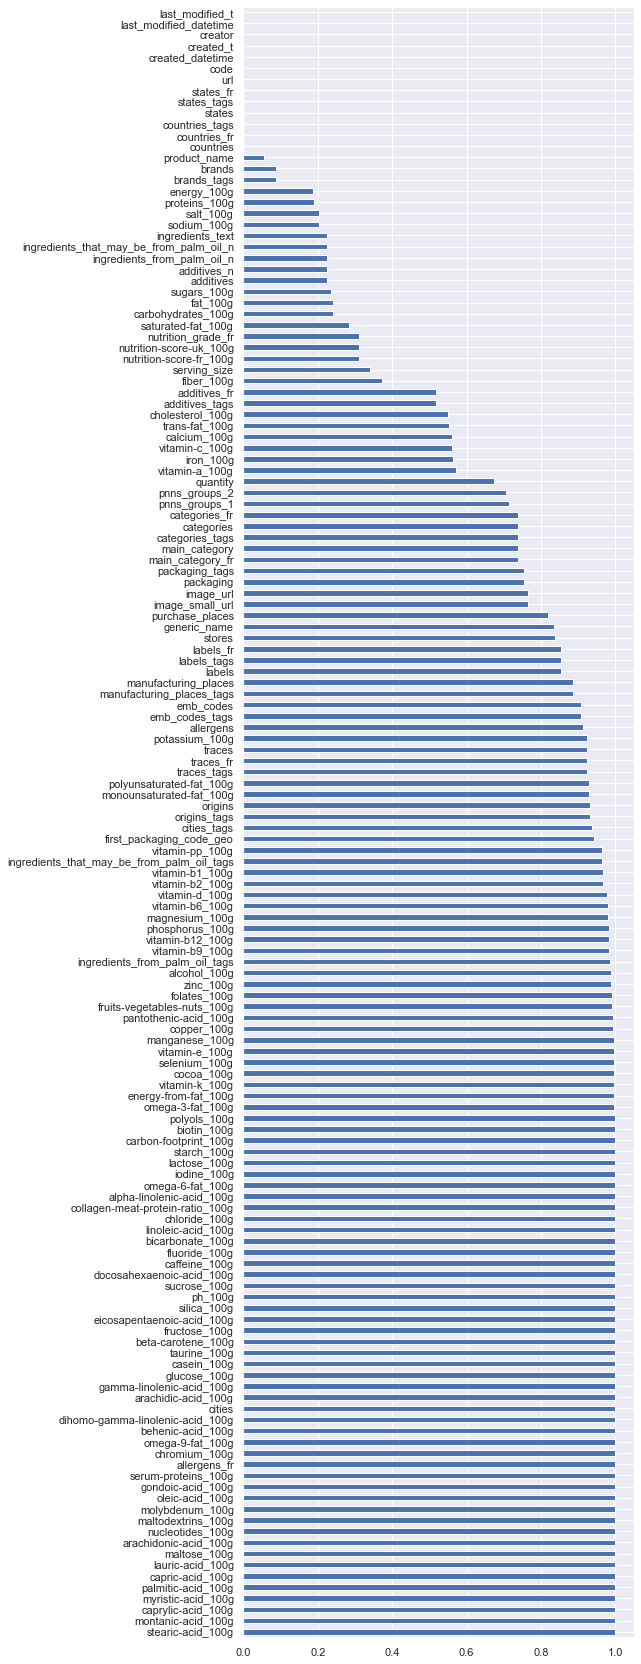

In [156]:
(df.isna().mean().sort_values(ascending=False)).plot.barh(figsize=(7,30))

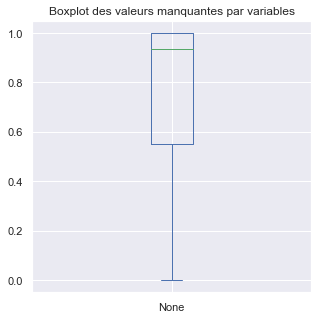

Text(0.5, 1.0, 'Histogramme des valeurs manquantes variables')

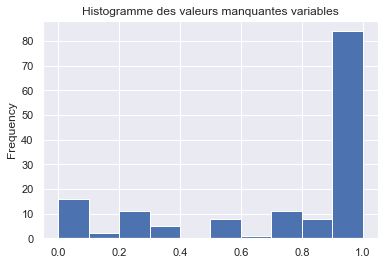

In [157]:
ax=(df.isna().mean()).plot.box(figsize=(5,5))
plt.title('Boxplot des valeurs manquantes par variables')
plt.show()
(df.isna().mean()).plot(kind='hist')
plt.title('Histogramme des valeurs manquantes variables')

<font color='gray'> On voit qu'il nous reste tout de même beaucoup de variables très peu remplies. On peut alors voir lesquelles sont peu remplies afin de savoir si nous pouvons les éliminer: 

In [158]:
for k,i in zip(df.isna().mean()[df.isna().mean().sort_values(ascending=False)>0.75].index,df.isna().mean()[df.isna().mean().sort_values(ascending=False)>0.75].values):
    print(k, i)

generic_name 0.8354126918808374
packaging 0.753843851707755
packaging_tags 0.7538407342286734
origins 0.9308231391767361
origins_tags 0.9309384859027596
manufacturing_places 0.8862088960383075
manufacturing_places_tags 0.8862276009127978
labels 0.8548532914344145
labels_tags 0.8545883057124687
labels_fr 0.8545197211726709
emb_codes 0.9086391580312496
emb_codes_tags 0.9086485104684947
first_packaging_code_geo 0.941382040826506
cities 0.9999282979811206
cities_tags 0.9366528250595438
purchase_places 0.8185845397977379
stores 0.8387577469355181
allergens 0.9116381729078598
allergens_fr 0.9999407678974475
traces 0.9240800319229858
traces_tags 0.924154851420947
traces_fr 0.9240831494020675
ingredients_from_palm_oil_tags 0.9849269886399062
ingredients_that_may_be_from_palm_oil_tags 0.9635379646602571
image_url 0.7635828563590338
image_small_url 0.7635828563590338
energy-from-fat_100g 0.99732832042697
caprylic-acid_100g 0.9999968825209183
capric-acid_100g 0.9999937650418366
lauric-acid_100g 0

<font color='gray'> Après une discussion avec une connaissance dans le milieu des nutritonniste et en suivant mon idée de projet, je ne perds pas d'information primordiable en virant toutes les variables ci-dessus. Je les drop. 

In [159]:
lst_suppr=df.isna().mean()[df.isna().mean().sort_values(ascending=False)>0.75].index.values
df.drop(lst_suppr,axis=1,inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 50 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   url                                      320749 non-null  object 
 2   creator                                  320770 non-null  object 
 3   created_t                                320769 non-null  object 
 4   created_datetime                         320763 non-null  object 
 5   last_modified_t                          320772 non-null  object 
 6   last_modified_datetime                   320772 non-null  object 
 7   product_name                             303010 non-null  object 
 8   quantity                                 104819 non-null  object 
 9   brands                                   292360 non-null  object 
 10  brands_tags                     

### $\to$ Sélection variables pertinentes

In [161]:
lst_analyse=['nutrition_grade_fr',
             'iron_100g',
             'sodium_100g',
             'fat_100g',
             'proteins_100g',
             'fiber_100g',
             'calcium_100g',
             'carbohydrates_100g',
             'energy_100g',
             'code',
             'main_category_fr']

In [162]:
print(lst_analyse)

['nutrition_grade_fr', 'iron_100g', 'sodium_100g', 'fat_100g', 'proteins_100g', 'fiber_100g', 'calcium_100g', 'carbohydrates_100g', 'energy_100g', 'code', 'main_category_fr']


Text(0, 0.5, '%')

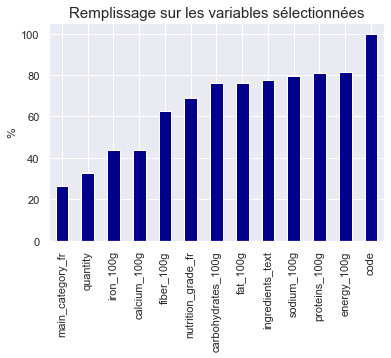

In [163]:
(df[lst_analyse+['quantity','ingredients_text']].notna().mean()*100).sort_values().plot(kind='bar',color='darkblue')
plt.title('Remplissage sur les variables sélectionnées',fontsize=15)
plt.ylabel('%')


<AxesSubplot:>

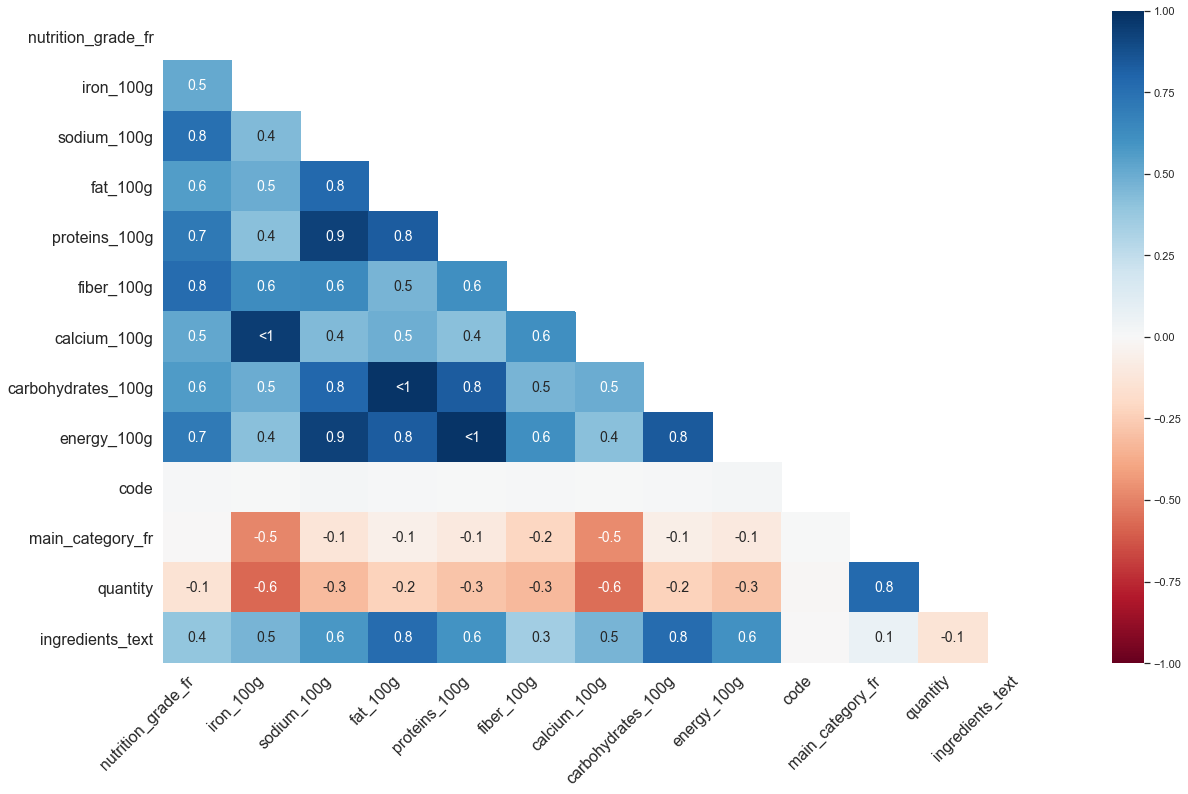

In [164]:
msno.heatmap(df
             
             
             
             
             
    [lst_analyse+['quantity','ingredients_text']])

In [165]:
df_=df[lst_analyse]
df_['nutrition_grade_fr']=df_['nutrition_grade_fr'].str.upper()
df_.head()

,nutrition_grade_fr,iron_100g,sodium_100g,fat_100g,proteins_100g,fiber_100g,calcium_100g,carbohydrates_100g,energy_100g,code,main_category_fr
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000000003087,NaN
1,D,0.00129,0.000,28.57,3.57,3.6,0.000,64.29,2243.0,0000000004530,NaN
2,B,0.00129,0.250,17.86,17.86,7.1,0.071,60.71,1941.0,0000000004559,NaN
3,D,0.00514,0.482,57.14,17.86,7.1,0.143,17.86,2540.0,0000000016087,NaN
4,NaN,NaN,NaN,1.43,8.57,5.7,NaN,77.14,1552.0,0000000016094,NaN


In [166]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nutrition_grade_fr  221210 non-null  object 
 1   iron_100g           140462 non-null  float64
 2   sodium_100g         255463 non-null  float64
 3   fat_100g            243891 non-null  float64
 4   proteins_100g       259922 non-null  float64
 5   fiber_100g          200886 non-null  float64
 6   calcium_100g        141050 non-null  float64
 7   carbohydrates_100g  243588 non-null  float64
 8   energy_100g         261113 non-null  float64
 9   code                320749 non-null  object 
 10  main_category_fr    84366 non-null   object 
dtypes: float64(8), object(3)
memory usage: 26.9+ MB


In [167]:
len(df_.code.unique())

320750

In [168]:
desc_df(df_)

Dans la base de données d'open food fact, on a 320772 lignes avec 11 variables. Elle est remplie à 67.24 % et il y a 11 lignes dupliquées


In [169]:
df_.code.isna().sum(),df_[df_.code.isna()].isna().mean().mean()

(23, 0.9367588932806324)

In [170]:
df_[df_.duplicated()].isna().sum()

nutrition_grade_fr    11
iron_100g             11
sodium_100g           11
fat_100g              11
proteins_100g          6
fiber_100g            11
calcium_100g          11
carbohydrates_100g    11
energy_100g           11
code                  11
main_category_fr      11
dtype: int64

In [171]:
df_['quantité']=df.loc[df_.index,'quantity']

In [172]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nutrition_grade_fr  221210 non-null  object 
 1   iron_100g           140462 non-null  float64
 2   sodium_100g         255463 non-null  float64
 3   fat_100g            243891 non-null  float64
 4   proteins_100g       259922 non-null  float64
 5   fiber_100g          200886 non-null  float64
 6   calcium_100g        141050 non-null  float64
 7   carbohydrates_100g  243588 non-null  float64
 8   energy_100g         261113 non-null  float64
 9   code                320749 non-null  object 
 10  main_category_fr    84366 non-null   object 
 11  quantité            104819 non-null  object 
dtypes: float64(8), object(4)
memory usage: 29.4+ MB


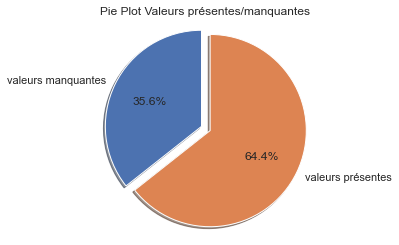

<Figure size 432x288 with 0 Axes>

In [173]:
notna=df_.notna().mean().mean()*100
na=100-notna
labels = 'valeurs manquantes','valeurs présentes'
sizes = [na, notna]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
plt.figure(facecolor=None)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Pie Plot Valeurs présentes/manquantes')
plt.show()

<AxesSubplot:>

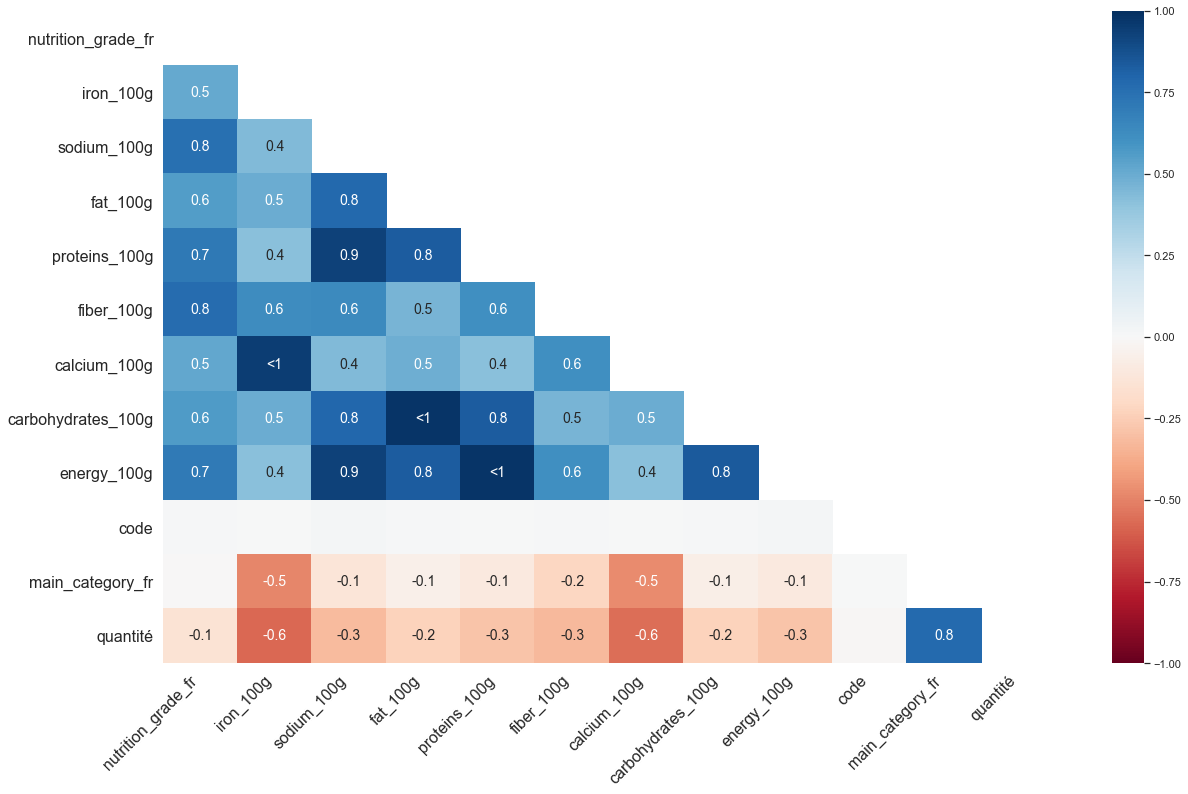

In [174]:
msno.heatmap(df_)

In [175]:
desc_df(df_)

Dans la base de données d'open food fact, on a 320772 lignes avec 12 variables. Elle est remplie à 64.36 % et il y a 4 lignes dupliquées


<font color='gray'> On se servira par la suite du nutriscore et il est compliqué de refaire ce calcul sachant qu'il se basera lui même sur des valeurs estimées par remplissage.
 <font color='gray'>   Je décide donc de supprimer les lignes dont le nutriscore n'est pas renseigné. On voit que sur le heatmat juste ci-dessus que la dépendance des valeurs manquantes entre nutriscore et les variables nutritionnelles sont corrélées.

In [176]:
df_.dropna(subset=['nutrition_grade_fr'],inplace=True)

In [177]:
desc_df(df_)

Dans la base de données d'open food fact, on a 221210 lignes avec 12 variables. Elle est remplie à 78.98 % et il y a 0 lignes dupliquées


<font color='gray'> 82,76% c'est un bon taux de remplissage et on voit maintenant sans prendre en compte les catégories, qui pour le coup ont une corrélations négatives, c'est-à-dire que les valeurs manquantes ne match pas avec celles des autres variables.

In [178]:
desc_df(df_[['nutrition_grade_fr',
             'iron_100g',
             'sodium_100g',
             'proteins_100g',
             'fat_100g',
             'fiber_100g',
             'calcium_100g',
             'carbohydrates_100g',
             'energy_100g',
             'code']])

Dans la base de données d'open food fact, on a 221210 lignes avec 10 variables. Elle est remplie à 89.35 % et il y a 0 lignes dupliquées


<font color='gray'> On voit qu'il y a 6% du taux de remplissage seulement pour les catégories. On peut alors garder cette variable sans faire de remplissage dessus. 

In [179]:
df_

,nutrition_grade_fr,iron_100g,sodium_100g,fat_100g,proteins_100g,fiber_100g,calcium_100g,carbohydrates_100g,energy_100g,code,main_category_fr,quantité
1,D,0.00129,0.000000,28.57,3.57,3.6,0.000,64.29,2243.0,0000000004530,NaN,NaN
2,B,0.00129,0.250000,17.86,17.86,7.1,0.071,60.71,1941.0,0000000004559,NaN,NaN
3,D,0.00514,0.482000,57.14,17.86,7.1,0.143,17.86,2540.0,0000000016087,NaN,NaN
7,C,0.00422,0.055000,18.75,14.06,9.4,0.062,57.81,1833.0,0000000016124,NaN,NaN
12,D,0.00360,0.633000,36.67,16.67,6.7,0.133,36.67,2230.0,0000000016872,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
320742,A,0.00127,0.012000,0.00,1.18,4.7,0.000,87.06,1477.0,9787461062105,NaN,NaN
320751,A,0.00380,0.267717,2.80,13.00,5.9,NaN,74.80,1643.0,9847548283004,Pains,NaN
320757,B,NaN,0.039370,NaN,21.22,12.2,NaN,NaN,2406.0,9900000000233,NaN,NaN
320763,C,NaN,0.010000,0.20,0.50,0.2,NaN,0.50,21.0,99111250,Thés verts,50 g


<AxesSubplot:ylabel='nutrition_grade_fr'>

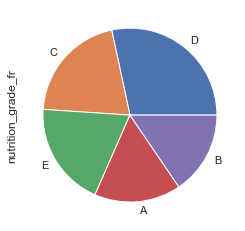

In [180]:
df_['nutrition_grade_fr'].value_counts().plot(kind='pie')

In [181]:
df_['nutrition_grade_fr'].isna().value_counts()

False    221210
Name: nutrition_grade_fr, dtype: int64

In [182]:
df_.isna().mean()

nutrition_grade_fr    0.000000
iron_100g             0.391334
sodium_100g           0.000863
fat_100g              0.079006
proteins_100g         0.000863
fiber_100g            0.124045
calcium_100g          0.388002
carbohydrates_100g    0.079124
energy_100g           0.000863
code                  0.000000
main_category_fr      0.738800
quantité              0.718629
dtype: float64

<font color='gray'> On fait une première visualisation des données

<AxesSubplot:>

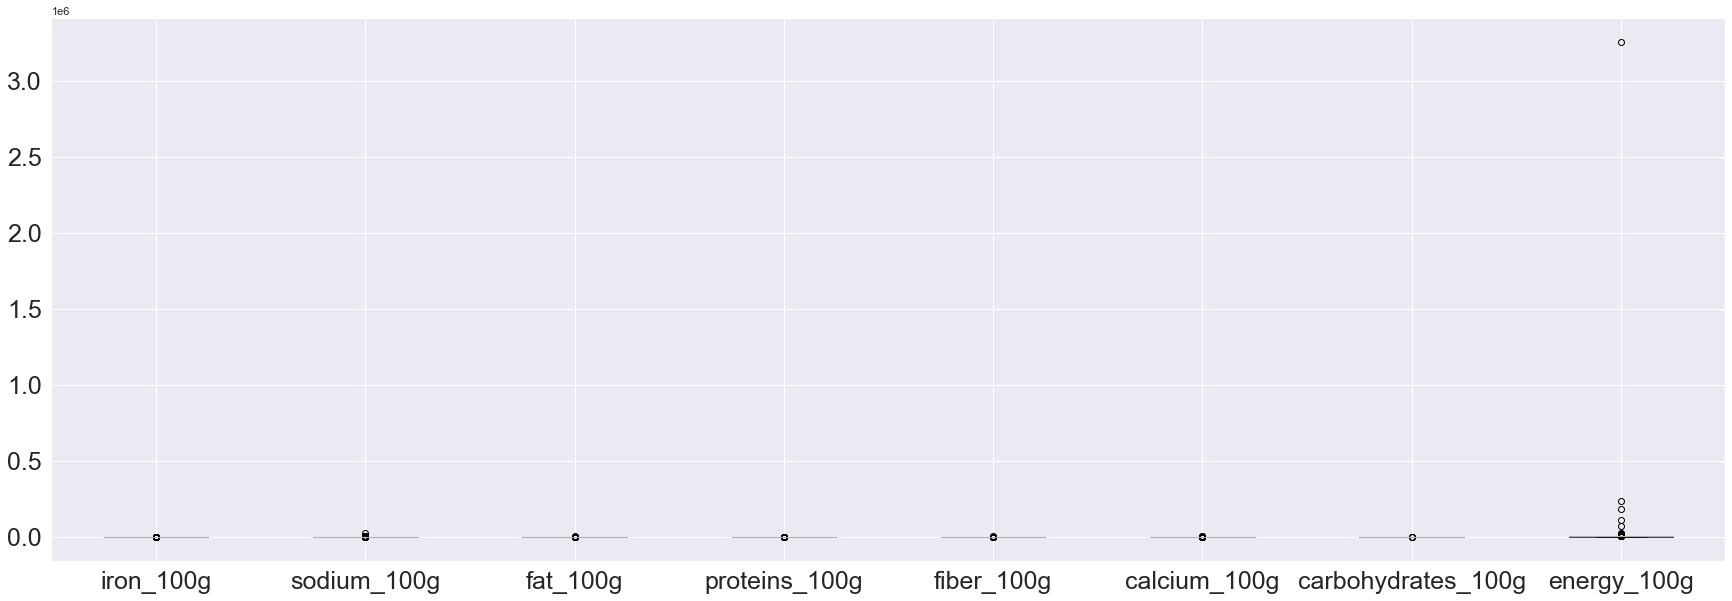

In [183]:
df_.boxplot(figsize=(30,10),fontsize=25)

In [184]:
df_['fat_100g']

1         28.57
2         17.86
3         57.14
7         18.75
12        36.67
          ...  
320742     0.00
320751     2.80
320757      NaN
320763     0.20
320768     0.00
Name: fat_100g, Length: 221210, dtype: float64

In [185]:
l=[
 'iron_100g',
 'sodium_100g',
 'proteins_100g',
 'fiber_100g',
 'calcium_100g',
 'fat_100g',
 'carbohydrates_100g',
 'energy_100g']
for k in l:
    print('-'*5+k+'-'*5)
    print(df_[k].describe())
    print('_'*35)

-----iron_100g-----
count    134643.000000
mean          0.003102
std           0.172223
min          -0.000260
25%           0.000000
50%           0.001010
75%           0.002400
max          50.000000
Name: iron_100g, dtype: float64
___________________________________
-----sodium_100g-----
count    221019.000000
mean          0.645805
std          54.100789
min           0.000000
25%           0.039370
50%           0.255906
75%           0.536000
max       25320.000000
Name: sodium_100g, dtype: float64
___________________________________
-----proteins_100g-----
count    221019.000000
mean          7.775905
std           8.123994
min          -3.570000
25%           1.900000
50%           5.700000
75%          10.710000
max         430.000000
Name: proteins_100g, dtype: float64
___________________________________
-----fiber_100g-----
count    193770.000000
mean          2.828862
std          13.016507
min           0.000000
25%           0.000000
50%           1.500000
75%          

<font color='gray'> On va les tracer un par un pour observer plus précisemment leurs distributions. 

In [186]:
import matplotlib.colors as mc

In [187]:
clr=list(mc.cnames.keys())
cmax=len(mc.cnames.keys())

iron_100g


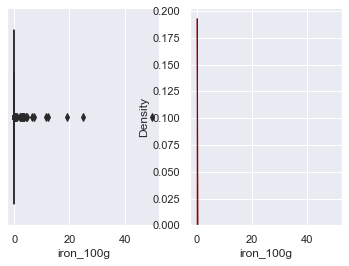

<Figure size 2160x360 with 0 Axes>

sodium_100g


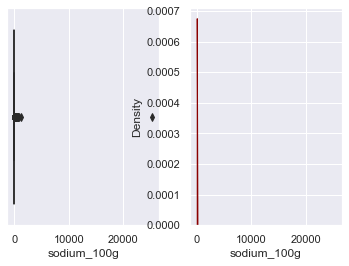

<Figure size 2160x360 with 0 Axes>

proteins_100g


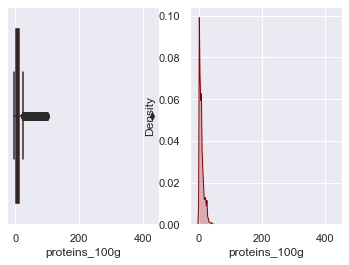

<Figure size 2160x360 with 0 Axes>

fiber_100g


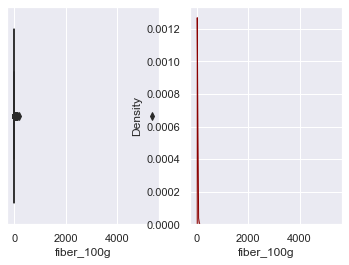

<Figure size 2160x360 with 0 Axes>

calcium_100g


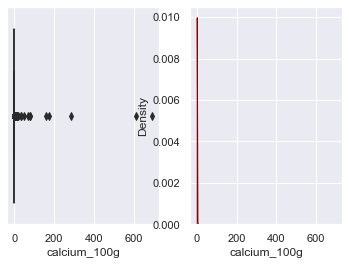

<Figure size 2160x360 with 0 Axes>

fat_100g


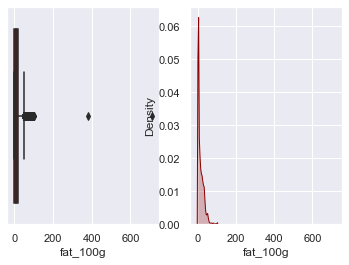

<Figure size 2160x360 with 0 Axes>

carbohydrates_100g


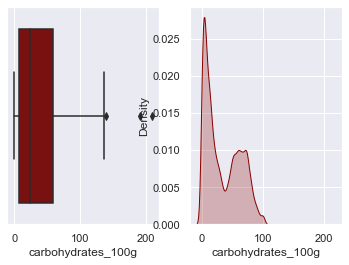

<Figure size 2160x360 with 0 Axes>

energy_100g


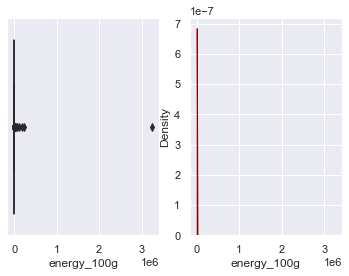

<Figure size 2160x360 with 0 Axes>

In [188]:
sns.set(style="darkgrid")
c='darkred'

for k in l:
    print(k)
    plt.subplot(1,2,1)
    sns.boxplot(df_[k],orient="h",color=c)
    plt.subplot(1,2,2)
    sns.kdeplot(df_[k],color=c,bw=0.1,shade=True)
    plt.figure(figsize=(30,5))
    plt.show()
    

Text(0, 0.5, 'Grammes')

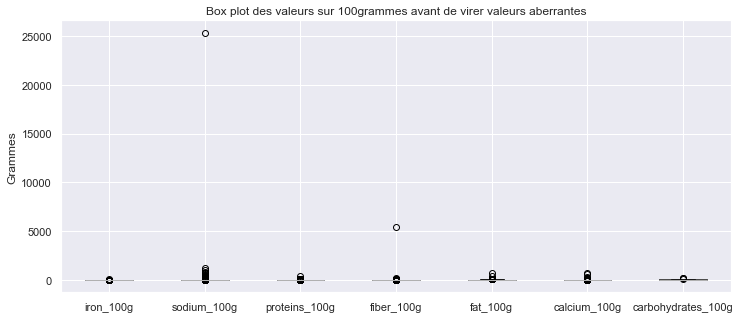

In [189]:
df_[l_100g].boxplot(figsize=(12,5))
plt.title('Box plot des valeurs sur 100grammes avant de virer valeurs aberrantes')
plt.ylabel('Grammes')

<font color='gray'> - En observant ces distributions, on peut voir une dispersion notable avec des valeurs aberrantes, notamment quand les valeurs dépassent les 100g ou avec des valeurs négatives. On peut ainsi voir, à part pour l'energie, combien de données sont dans cet intervalle afin de prendre une décision sur le nettoyage.

In [190]:
tot=0
l_100g=[
 'iron_100g',
 'sodium_100g',
 'proteins_100g',
 'fiber_100g',
 'fat_100g',
 'calcium_100g',
 'carbohydrates_100g']# C'est la liste des variables nutritionnelles qui sont traitées de la même façon
for k in l_100g: 
    tot+=(df_[k]<0).sum().sum()+(df_[k]>100).sum().sum()
    print('pour', k, 'il y a',(df_[k]<0).sum(),'valeurs négative donc aberrantes\nEt avec',(df_[k]>100).sum(),'valeurs sup à 100 et donc aberrantes\n','_'*10)
print('on a un total de', tot ,'valeurs surement aberrantes')

pour iron_100g il y a 1 valeurs négative donc aberrantes
Et avec 0 valeurs sup à 100 et donc aberrantes
 __________
pour sodium_100g il y a 0 valeurs négative donc aberrantes
Et avec 22 valeurs sup à 100 et donc aberrantes
 __________
pour proteins_100g il y a 1 valeurs négative donc aberrantes
Et avec 1 valeurs sup à 100 et donc aberrantes
 __________
pour fiber_100g il y a 0 valeurs négative donc aberrantes
Et avec 2 valeurs sup à 100 et donc aberrantes
 __________
pour fat_100g il y a 0 valeurs négative donc aberrantes
Et avec 4 valeurs sup à 100 et donc aberrantes
 __________
pour calcium_100g il y a 0 valeurs négative donc aberrantes
Et avec 5 valeurs sup à 100 et donc aberrantes
 __________
pour carbohydrates_100g il y a 0 valeurs négative donc aberrantes
Et avec 12 valeurs sup à 100 et donc aberrantes
 __________
on a un total de 48 valeurs surement aberrantes


<font color='gray'> Je décide de mettre ces valeurs aberrantes en NaN pour ainsi les remplir. Comme il n'y en a pas beaucoup cela ne posera pas de problème.

In [191]:
df_[l_100g]=df_[l_100g][~((df[l_100g]>100)|(df_[l_100g]<0))]

In [192]:
desc_df(df_)

Dans la base de données d'open food fact, on a 221210 lignes avec 12 variables. Elle est remplie à 78.98 % et il y a 0 lignes dupliquées


<font color="red"> On a perdu seulement 0.01% de remplissage ce qui est assez petit et donc on va pouvoir effectuer un nouveau remplissage 

On peut réobserver les distribution après le nettoyage: 

Text(0, 0.5, 'Grammes')

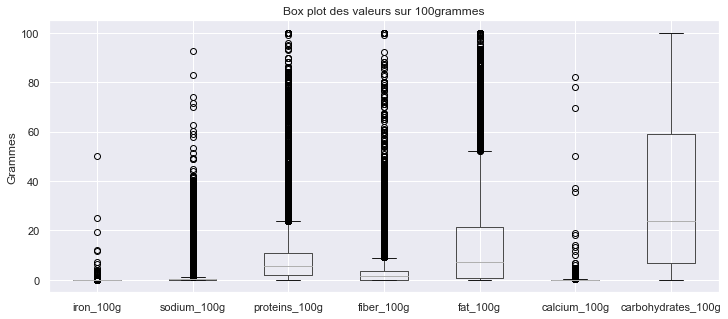

In [193]:
df_[l_100g].boxplot(figsize=(12,5))
plt.title('Box plot des valeurs sur 100grammes')
plt.ylabel('Grammes')

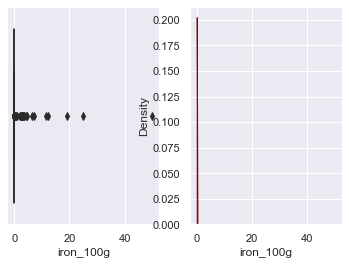

<Figure size 2160x360 with 0 Axes>

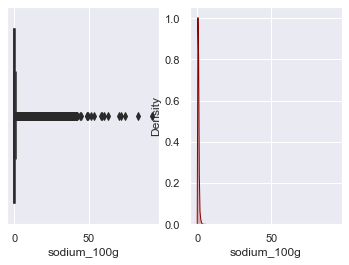

<Figure size 2160x360 with 0 Axes>

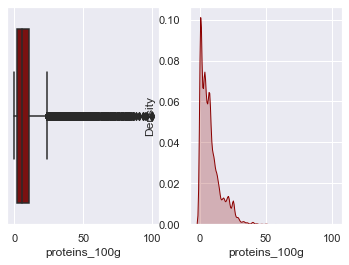

<Figure size 2160x360 with 0 Axes>

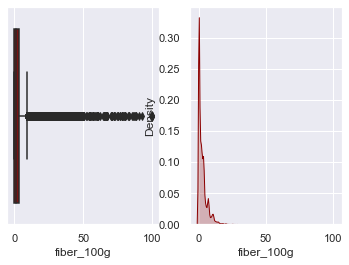

<Figure size 2160x360 with 0 Axes>

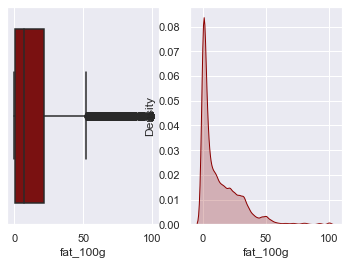

<Figure size 2160x360 with 0 Axes>

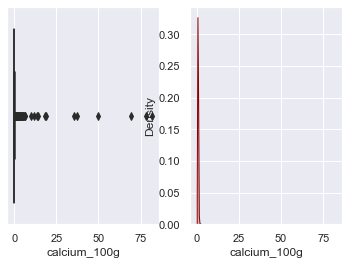

<Figure size 2160x360 with 0 Axes>

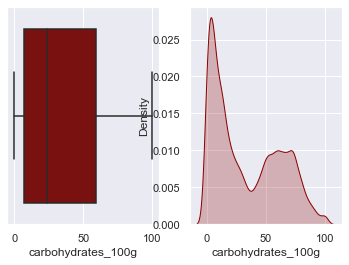

<Figure size 2160x360 with 0 Axes>

In [194]:

for k in l_100g:
    plt.subplot(1,2,1)
    sns.boxplot(df_[k],orient="h",color=c)
    plt.subplot(1,2,2)
    sns.kdeplot(df_[k],color=c,bw=0.1,shade=True)
    plt.figure(figsize=(30,5))
    plt.show()
    

On s'apperçoit qu'il existe toujours des valeurs qui se séparent clairement de la tendance mais nous pouvons supposer que ce ne sont plus des valeurs aberrantes mais des valeurs atypiques.

### $\to$ Etude energy_100g 

<AxesSubplot:>

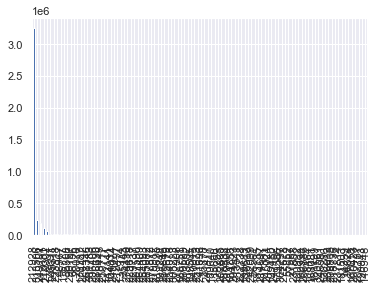

In [195]:
df_['energy_100g'].sort_values(ascending=False)[:100].plot(kind='bar')

<AxesSubplot:xlabel='energy_100g'>

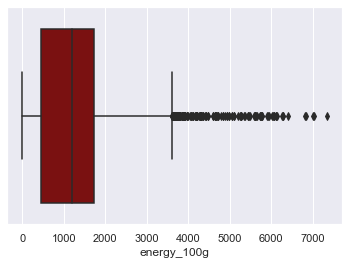

In [196]:
sns.boxplot(df_['energy_100g'].sort_values(ascending=False)[20:-10],orient="v",color=c)

<AxesSubplot:>

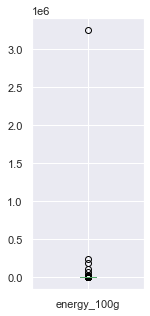

In [197]:
df_['energy_100g'].plot.box(figsize=(2,5))

In [198]:
(df_['energy_100g'].sort_values(ascending=False)<4500).value_counts()

True     220933
False       277
Name: energy_100g, dtype: int64

<font color='gray'> On fixe un seuil à 4500KJ en se basant sur ce site (http://sante-voyage.e-monsite.com/pages/nutrition-a-bord-2/l-energie-des-aliments.html). Je décide donc de supprimer ces aliments en pensant que si on peut retrouver une valeur aberrantes sur l'energie, on peut douter sur la qualité des autres informations tel que le sodium, proteine etc.

In [199]:
df.loc[df_['energy_100g'].sort_values(ascending=False).index[:10]].product_name,df_['energy_100g'].sort_values(ascending=False).values[:10]

(212928                                          Pois cassés
 313506                   Nusco, Chocolate Spread, Chocolate
 249101    Légume Noisettes Carottes, 500 Grammes, Marque...
 112681                       Premium Extra Virgin Olive Oil
 219302                                                  NaN
 176697                                               bubbly
 245311           mini choux goût fromage de chèvre - poivre
 223318    Huiles vierge biologique de Colza - première p...
 46967                                 Instant Aka Miso Soup
 115777                                Flave!, Assorted Fish
 Name: product_name, dtype: object,
 array([3251373.,  231199.,  182764.,  110579.,   69292.,   22000.,
          18700.,   15481.,   14644.,   14347.]))

<font color='gray'> Après avoir observé plusieurs aliments et en regardant la valeur de l'energie pour 100g, on remarque que la valeur est bien celle en kj. Or on sait que 1 Kcal~=4.18KJ et que l'apport journalier pour un Homme est d'en moyenne 2300 kcal, en joule sela fait 550kJ

In [200]:
df.loc[df_['energy_100g'].sort_values(ascending=False).index[-10:]].product_name,df_['energy_100g'].sort_values(ascending=False).values[-200:]

(313217                 DORITOS GOÛT SWEET CHILLI PEPPER
 314023                                 Yellow label tea
 314681                            Ma Panna Cotta Maison
 315535               Soupe au Pistou, à l'huile d'olive
 316037                                   Chicken Powder
 316412                                          오뜨 프로마즈
 316656                                Royal Whole Wheat
 317009    Instant bean vermicelli tom yam koong flavour
 319553             Char-grilled Sweet Potato Chunky Dip
 320653                      King White Coffee 3in1 IPOH
 Name: product_name, dtype: object,
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, n

In [201]:
df_=df_[(df_['energy_100g']<4500)]

In [202]:
(df_['energy_100g']<0).value_counts()

False    220933
Name: energy_100g, dtype: int64

<AxesSubplot:>

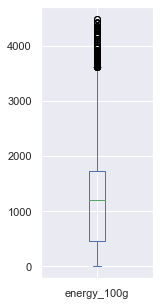

In [203]:
df_['energy_100g'].plot.box(figsize=(2,5))


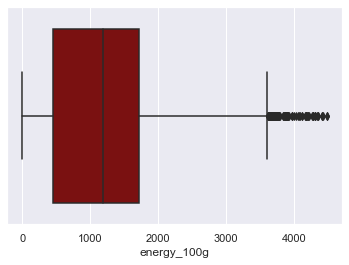

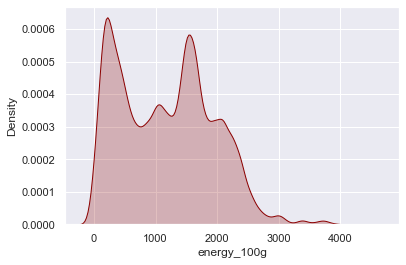

In [204]:
sns.boxplot(df_['energy_100g'],orient="h",color=c)
plt.show()
sns.kdeplot( df_['energy_100g'],color=c,bw=0.1,shade=True)
plt.show()

### $\to$ Ingrédients par aliment:

In [205]:
df.ingredients_text.notna().mean()

0.7761338271420198

In [206]:
s_ing=df.ingredients_text

In [207]:
s_ing.dropna(inplace=True)

In [208]:
for k in s_ing[5:20]:
    print(k)

Organic long grain white rice
Org oats, org hemp granola (org oats, evaporated cane juice, org expeller-pressed canola oil, crispy rice [org brown rice flour, org evaporated cane juice, org molasses, sea salt], org flax seeds, org oat solids, hemp seeds), org raisins, org dates, org almonds, org hazelnuts, org coconut, org sunflower seeds, org pumpkin seeds, org flax seeds, org corn flakes (org corn meal, org grape and/or pear juice concentrate, sea salt), org quinoa amaranth flakes (org corn meal, org yellow corn flour, org evaporated cane juice, org flax, org buckwheat flour, org quinoa, org amaranth, sea salt, tocopherols [natural vitamin e]).
Organic chocolate liquor, organic raw cane sugar, organic cocoa butter, organic unrefined whole cane sugar, organic ground vanilla beans.
Organic expeller pressed, refined high oleic sunflower oil
Organic adzuki beans
Organic refined durum semolina wheat flour
Roasted peanuts (peanuts, peanut or canola oil, salt), sesame sticks (unbleached whe

### $\to$ Observation finale avant remplissage

In [209]:
desc_df(df_)

Dans la base de données d'open food fact, on a 220933 lignes avec 12 variables. Elle est remplie à 79.03 % et il y a 0 lignes dupliquées


Text(0, 0.5, '%')

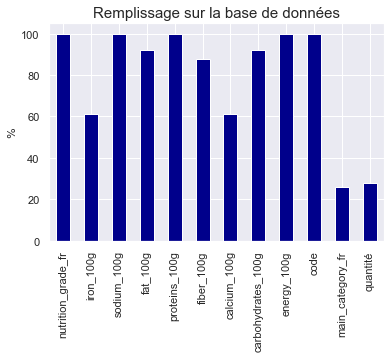

In [210]:
df_.notna().mean().apply(lambda x:100*x).plot(kind='bar',color='darkblue')
plt.title('Remplissage sur la base de données',fontsize=15)
plt.ylabel('%')


On peut s'intéresser à la distribution au sein du nutriscore:

In [211]:
da_=((df_.nutrition_grade_fr.value_counts()/df_.nutrition_grade_fr.value_counts().sum())*100).apply(lambda x:str(x)[:5]).values

Text(0.5, 1.0, 'Pie Plot de la distribution des aliments par nutriscore (A-E)')

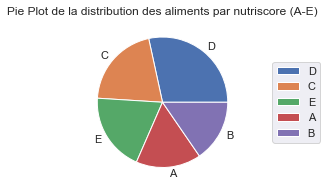

In [212]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

df_.nutrition_grade_fr.value_counts().plot(kind='pie')

plt.legend(loc='right',bbox_to_anchor=(1, 0, 0.5, 1))
plt.ylabel('')


plt.title('Pie Plot de la distribution des aliments par nutriscore (A-E)')

Text(0.5, 1.0, 'Pie Plot de la distribution\n des aliments par nutriscore (A-E)')

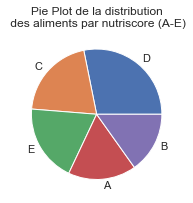

In [266]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

df_.nutrition_grade_fr.value_counts().plot(kind='pie')

#plt.legend(loc='right',bbox_to_anchor=(1, 0, 0.5, 1))
plt.ylabel('')


plt.title('Pie Plot de la distribution\n des aliments par nutriscore (A-E)')

In [213]:
s_cat=df_.main_category_fr.apply(lambda x: x if (type(x)==str) else 'No Se').value_counts()

Text(0, 0.5, '# aliment/catégorie')

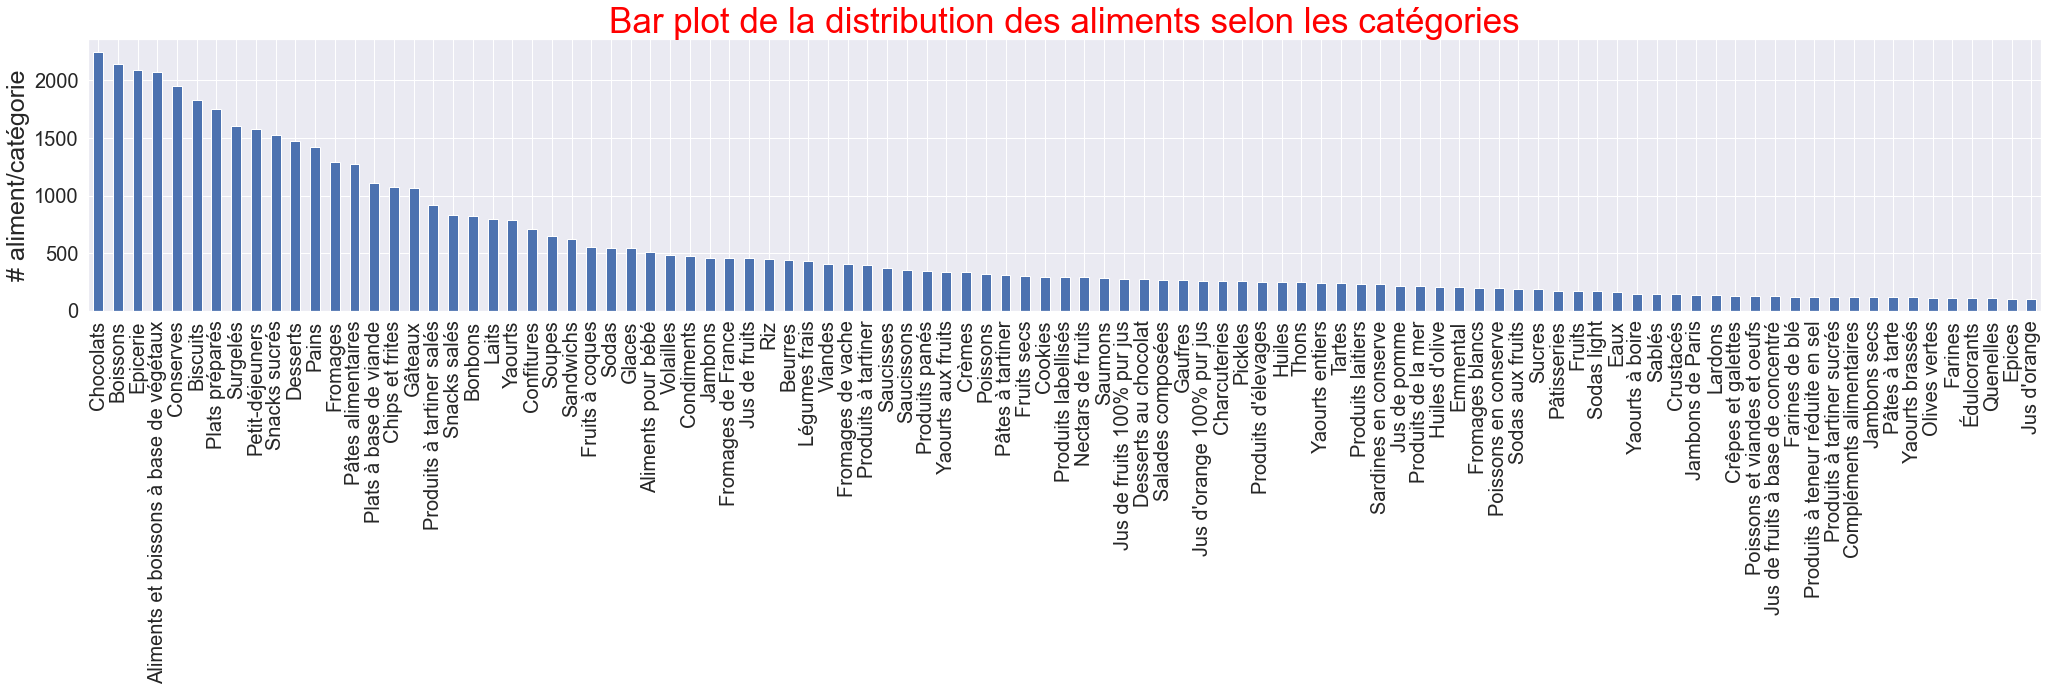

In [214]:
s_cat[1:100].plot(kind='bar',figsize=(35,5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Bar plot de la distribution des aliments selon les catégories',fontsize=35,color='red')
plt.ylabel('# aliment/catégorie',fontsize=25)

<font color='gray'> On va voir le remplissage par ligne avant de faire le remplissage des valeurs manquantes:

Text(0, 0.5, "nombre d'individu")

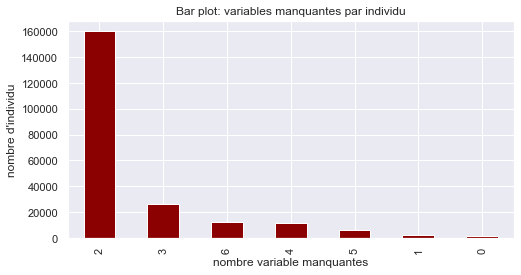

In [215]:
df_.isna().sum(axis=1).value_counts().plot(kind='bar',color='darkred',figsize=(8,4))
plt.title('Bar plot: variables manquantes par individu')
plt.xlabel('nombre variable manquantes')
plt.ylabel("nombre d'individu")

In [216]:
df_.isna().mean()

nutrition_grade_fr    0.000000
iron_100g             0.390648
sodium_100g           0.000100
fat_100g              0.078033
proteins_100g         0.000005
fiber_100g            0.123322
calcium_100g          0.387330
carbohydrates_100g    0.078182
energy_100g           0.000000
code                  0.000000
main_category_fr      0.739260
quantité              0.719209
dtype: float64

<font color='gray'> On voit qu'il y a beaucoup d'invidu ayant seulement une valeur manquante, et plusieurs ayant 2, 3 et 5. je décide donc de fixer un seuil et de supprimer les individus ayant plus de 3 valeurs manquantes. 

In [217]:
(df_.isna().sum(axis=1)<=3).sum(),(df_.isna().sum(axis=1)<=3).count() # onsupprimerait environ 1000 individus.

(190260, 220933)

In [218]:
abs((df_.isna().sum(axis=1)<=3).count()-(df_.isna().sum(axis=1)<=3).sum())# onsupprimerait environ 1000 individus.

30673

In [219]:
df_=df_[df_.isna().sum(axis=1)<=3]

In [220]:
desc_df(df_)

Dans la base de données d'open food fact, on a 190260 lignes avec 12 variables. Elle est remplie à 82.39 % et il y a 0 lignes dupliquées


Text(0, 0.5, '%')

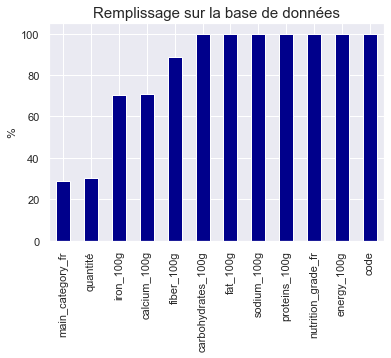

In [222]:
df_.notna().mean().apply(lambda x:100*x).sort_values().plot(kind='bar',color='darkblue')
plt.title('Remplissage sur la base de données',fontsize=15)
plt.ylabel('%')


<AxesSubplot:>

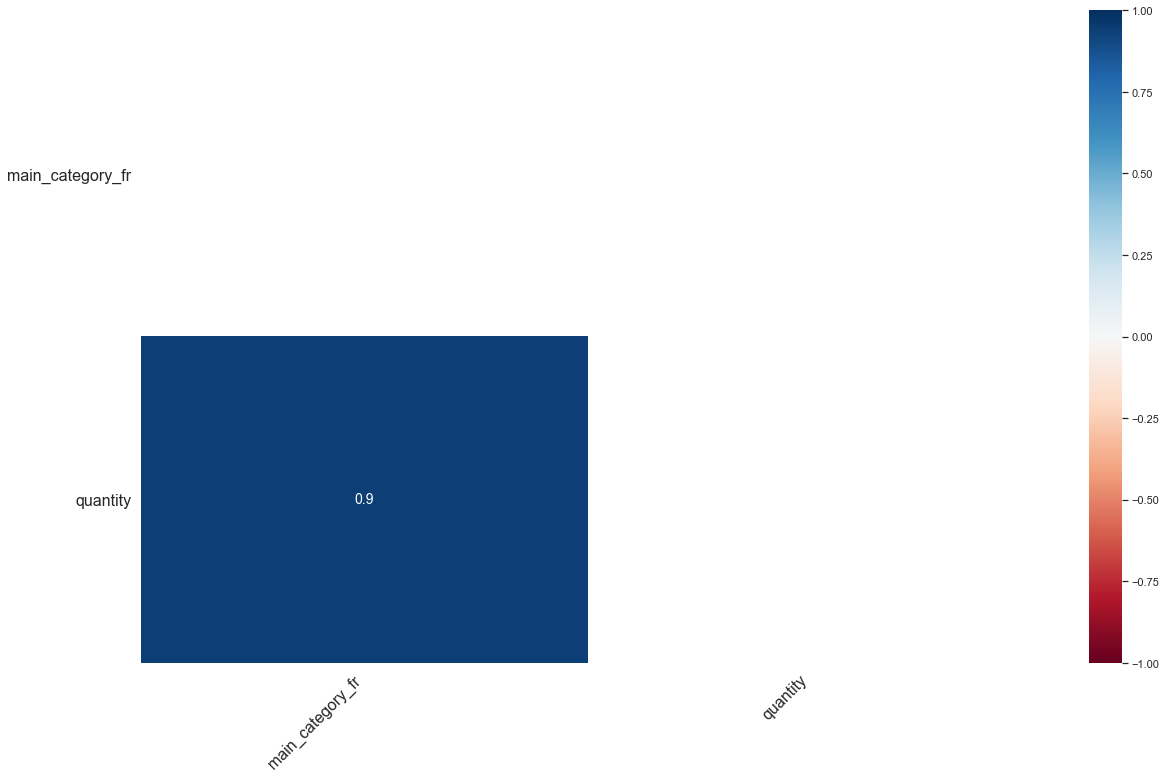

In [129]:
msno.heatmap(df.loc[df_.index,['main_category_fr','quantity']])

On ajoute les quantités qu'on aura sans doute besoin plus tard.

## $\Rightarrow$ <ins> Partie 2</ins>:  Remplissage des valeurs manquantes


In [322]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190260 entries, 1 to 320768
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nutrition_grade_fr  190260 non-null  object 
 1   iron_100g           134136 non-null  float64
 2   sodium_100g         190243 non-null  float64
 3   fat_100g            190080 non-null  float64
 4   proteins_100g       190259 non-null  float64
 5   fiber_100g          168834 non-null  float64
 6   calcium_100g        134973 non-null  float64
 7   carbohydrates_100g  190065 non-null  float64
 8   energy_100g         190260 non-null  float64
 9   code                190260 non-null  object 
 10  main_category_fr    54574 non-null   object 
 11  quantité            57313 non-null   object 
dtypes: float64(8), object(4)
memory usage: 22.9+ MB


In [323]:
l_r=['nutrition_grade_fr', 'iron_100g', 'sodium_100g', 'proteins_100g','fat_100g',
       'fiber_100g', 'calcium_100g', 'carbohydrates_100g', 'energy_100g']
print('Il nous reste à remplir', df_[l_r].isna().sum().sum(), 'valeurs manquantes et lets go')

Il nous reste à remplir 133230 valeurs manquantes et lets go


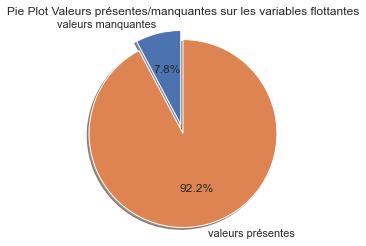

In [232]:
notna=df_[l_r].notna().mean().mean()*100
na=100-notna
labels = 'valeurs manquantes','valeurs présentes'
sizes = [na, notna]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Pie Plot Valeurs présentes/manquantes sur les variables flottantes')

plt.show()

<font color='gray'> On va s'intéresser à remplir touts les variables mise à part les catégories qui nous seront utiles plus tard

### $\to$ Remplissage 1: Remplissage naif

In [325]:
df_r_tot_mean=df_.mean()
df_r_tot_mean

iron_100g                0.003080
sodium_100g              0.479138
fat_100g                13.397682
proteins_100g            7.871833
fiber_100g               2.881910
calcium_100g             0.097599
carbohydrates_100g      33.168061
energy_100g           1180.585248
code                          inf
dtype: float64

In [89]:
df_r_naive=df_[l_r]

In [90]:
df_r_naive.fillna(df_r_naive.mean(),inplace=True)

In [91]:
df_r_naive.notna().mean()

nutrition_grade_fr    1.0
iron_100g             1.0
sodium_100g           1.0
proteins_100g         1.0
fat_100g              1.0
fiber_100g            1.0
calcium_100g          1.0
carbohydrates_100g    1.0
energy_100g           1.0
dtype: float64

In [92]:
df_r_naive['ingrédients']=df.loc[df_.index,'ingredients_text'].values
df_r_naive['code']=df.loc[df_.index,'code'].values
df_r_naive['main_category_fr']=df_['main_category_fr'].values
df_r_naive['quantité']=df.loc[df_.index,'quantity'].values

In [93]:
df_r_naive.to_csv('DF_naiveapproach.csv')

### $\to$ Remplissage 2: Moyenne par valeur nutriscore

In [94]:
df_r_nutri=df_[l_r]

In [95]:
df_r_nutri_mean=df_r_nutri.groupby('nutrition_grade_fr').mean()
df_r_nutri_mean

,iron_100g,sodium_100g,proteins_100g,fat_100g,fiber_100g,calcium_100g,carbohydrates_100g,energy_100g
nutrition_grade_fr,,,,,,,,
A,0.004431,0.131887,8.227365,2.620733,4.524347,0.064682,28.499851,707.317254
B,0.001107,0.215466,5.160853,3.961888,1.753193,0.054118,17.631122,523.771864
C,0.002978,0.666530,7.096964,10.131754,3.532765,0.077739,32.026005,1025.088574
D,0.004461,0.631003,8.774654,18.021554,2.765671,0.088912,40.622642,1491.026235
E,0.001595,0.568538,9.202548,26.984099,1.658690,0.193938,39.820774,1824.052733


In [96]:
df_r_nutri_mean.loc['A']['iron_100g']

0.004430581853819079

In [97]:
def remplissageParNutriscore(s,name,d_mean_nutri=df_r_nutri_mean,d_tot_mean=df_r_tot_mean):
    """ \n \n \n ________________ \n C'est une fonction qui prend un couple de données (s), la catégorie du nutriscore de notre individu et
    sa valeur dans la variable, qui sera précisé dans name. 
    On retournera selon différents cas possibles un couple de valeurs correspondant """
    if s.isna().sum()==0: #si tout rempli on retourne telle quelle
        return s
    elif type(s[0])!=str: #si la cat n'est pas de la forme d'une chaine de caractère (cas particulier et ne devrait pas arriver)
        s[0]=np.nan
        s[1]=df_tot_mean[name]
        return s
    else: #cas ou on remplace la valeurs manquantes par la moyenne du nutriscore correspondant
        if s[0]=='A':
            s[1]=d_mean_nutri.loc[s[0]][name]
            return s
        elif s[0]=='B':
            s[1]=d_mean_nutri.loc[s[0]][name]
            return s
        elif s[0]=='C':
            s[1]=d_mean_nutri.loc[s[0]][name]
            return s
        elif s[0]=='D':
            s[1]=d_mean_nutri.loc[s[0]][name]
            return s
        elif s[0]=='E':
            s[1]=d_mean_nutri.loc[s[0]][name]
            return s
        else:
            s[0]=np.nan
            s[1]=df_tot_mean[name]
            return s

In [98]:
help(remplissageParNutriscore)

Help on function remplissageParNutriscore in module __main__:

remplissageParNutriscore(s, name, d_mean_nutri=                    iron_100g  sodium_100g  proteins_100g   fat_100g  \
nutrition_grade_fr                                                     
A                    0.004431     0.131887       8.227365   2.620733   
B                    0.001107     0.215466       5.160853   3.961888   
C                    0.002978     0.666530       7.096964  10.131754   
D                    0.004461     0.631003       8.774654  18.021554   
E                    0.001595     0.568538       9.202548  26.984099   

                    fiber_100g  calcium_100g  carbohydrates_100g  energy_100g  
nutrition_grade_fr                                                             
A                     4.524347      0.064682           28.499851   707.317254  
B                     1.753193      0.054118           17.631122   523.771864  
C                     3.532765      0.077739           32.026005 

In [99]:
drrironex=df_[l_r[:2]].apply(remplissageParNutriscore,axis=1,name=l_r[1])

In [100]:
drrironex.isna().mean()

nutrition_grade_fr    0.0
iron_100g             0.0
dtype: float64

Yessail ça fonctionne donc on peut créer une boucle qui permet de faire toutes les variables (à part bien sur catégories qu'on ne va pas toucher pour le moment)

In [101]:
def remplirdfentier(data,lst=['nutrition_grade_fr', 'iron_100g', 'fat_100g','sodium_100g', 'proteins_100g',
       'fiber_100g', 'calcium_100g', 'carbohydrates_100g', 'energy_100g']):
    """La fonction permet de balayer toutes les variables qui nous intéressent puis les remplir avec la fonction précédemment faites """ 
    for k in lst[1:]:
        l_=[l_r[0]]
        l_.append(k) 
        data[l_]=data[l_].apply(remplissageParNutriscore,axis=1,name=k)
    return data

In [102]:
df_r_nutri=remplirdfentier(df_r_nutri)

Text(0.5, 1.0, 'Bar Plot remplissage par nutriscore des données')

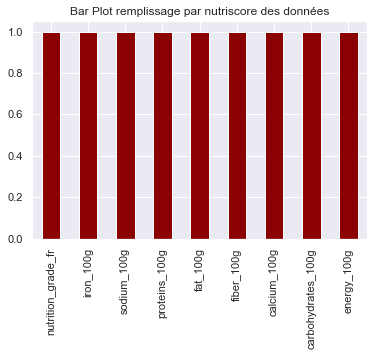

In [103]:
df_r_nutri.notna().mean().plot(kind='bar',color='darkred')
plt.title('Bar Plot remplissage par nutriscore des données')

### $\to$ Remplissage 3: Par K-NN

In [104]:
df_[l_r]

,nutrition_grade_fr,iron_100g,sodium_100g,proteins_100g,fat_100g,fiber_100g,calcium_100g,carbohydrates_100g,energy_100g
1,D,0.00129,0.000000,3.57,28.57,3.6,0.000,64.29,2243.0
2,B,0.00129,0.250000,17.86,17.86,7.1,0.071,60.71,1941.0
3,D,0.00514,0.482000,17.86,57.14,7.1,0.143,17.86,2540.0
7,C,0.00422,0.055000,14.06,18.75,9.4,0.062,57.81,1833.0
12,D,0.00360,0.633000,16.67,36.67,6.7,0.133,36.67,2230.0
...,...,...,...,...,...,...,...,...,...
320738,D,0.00500,0.375000,5.56,9.72,8.3,0.556,61.11,1393.0
320742,A,0.00127,0.012000,1.18,0.00,4.7,0.000,87.06,1477.0
320751,A,0.00380,0.267717,13.00,2.80,5.9,NaN,74.80,1643.0
320763,C,NaN,0.010000,0.50,0.20,0.2,NaN,0.50,21.0


In [105]:
df_[l_r].isna().mean()

nutrition_grade_fr    0.000000
iron_100g             0.294986
sodium_100g           0.000089
proteins_100g         0.000005
fat_100g              0.000946
fiber_100g            0.112614
calcium_100g          0.290587
carbohydrates_100g    0.001025
energy_100g           0.000000
dtype: float64

In [234]:
l_r_=['iron_100g',
 'sodium_100g',
 'proteins_100g',
 'fiber_100g',
 'calcium_100g',
 'fat_100g',
 'carbohydrates_100g',
 'energy_100g']


In [107]:
df_r_knn=df_[l_r_]

In [108]:
from sklearn.impute import KNNImputer
start_time = time.time()
imputer = KNNImputer(n_neighbors=2)
imputed = imputer.fit_transform(df_r_knn)
df_r_knn = pd.DataFrame(imputed, columns=df_r_knn.columns)
end_time=time.time() 
print("--- %s seconds ---" % (end_time - start_time),'\n Soit un total de --- %s minutes ---' % ((end_time - start_time)/60) )


--- 940.1371941566467 seconds --- 
 Soit un total de --- 15.668953235944112 minutes ---


Cette technique de remplissage avec le impute de sklearn prends vraiment trop de temps 20/30mins. La base de données est grande donc bon ca peut être normal. Essayons avec un modèle knn classique.

In [109]:
df_r_knn.isna().mean()

iron_100g             0.0
sodium_100g           0.0
proteins_100g         0.0
fiber_100g            0.0
calcium_100g          0.0
fat_100g              0.0
carbohydrates_100g    0.0
energy_100g           0.0
dtype: float64

In [110]:
len(df_.index)

190260

In [111]:
len(df_r_knn.index)

190260

In [112]:
df_[['nutrition_grade_fr','main_category_fr']].values

array([['D', nan],
       ['B', nan],
       ['D', nan],
       ...,
       ['A', 'Pains'],
       ['C', 'Thés verts'],
       ['B', nan]], dtype=object)

In [113]:
df_r_knn[['nutrition_grade_fr','main_category_fr']]=df_[['nutrition_grade_fr','main_category_fr']].values
df_r_knn['ingrédients']=df.loc[df_.index,'ingredients_text'].values
df_r_knn['code']=df.loc[df_.index,'code'].values
df_r_knn['quantité']=df.loc[df_.index,'quantity'].values

df_r_knn.isna().mean()

iron_100g             0.000000
sodium_100g           0.000000
proteins_100g         0.000000
fiber_100g            0.000000
calcium_100g          0.000000
fat_100g              0.000000
carbohydrates_100g    0.000000
energy_100g           0.000000
nutrition_grade_fr    0.000000
main_category_fr      0.713161
ingrédients           0.028146
code                  0.000000
quantité              0.698765
dtype: float64

In [114]:
len(df_r_knn['code'].unique())

190260

In [115]:
df_r_knn.to_csv('Df_OFF_remp_knn.csv')


In [116]:
df_r_knn

,iron_100g,sodium_100g,proteins_100g,fiber_100g,calcium_100g,fat_100g,carbohydrates_100g,energy_100g,nutrition_grade_fr,main_category_fr,ingrédients,code,quantité
0,0.001290,0.000000,3.57,3.6,0.000,28.57,64.29,2243.0,D,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",0000000004530,NaN
1,0.001290,0.250000,17.86,7.1,0.071,17.86,60.71,1941.0,B,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",0000000004559,NaN
2,0.005140,0.482000,17.86,7.1,0.143,57.14,17.86,2540.0,D,NaN,"Organic hazelnuts, organic cashews, organic wa...",0000000016087,NaN
3,0.004220,0.055000,14.06,9.4,0.062,18.75,57.81,1833.0,C,NaN,"Org oats, org hemp granola (org oats, evaporat...",0000000016124,NaN
4,0.003600,0.633000,16.67,6.7,0.133,36.67,36.67,2230.0,D,NaN,"Roasted peanuts (peanuts, peanut or canola oil...",0000000016872,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190255,0.005000,0.375000,5.56,8.3,0.556,9.72,61.11,1393.0,D,NaN,"Organic oat blend (organic rolled oats, organi...",9780803738782,NaN
190256,0.001270,0.012000,1.18,4.7,0.000,0.00,87.06,1477.0,A,NaN,Cassava.,9787461062105,NaN
190257,0.003800,0.267717,13.00,5.9,0.000,2.80,74.80,1643.0,A,Pains,NaN,9847548283004,NaN
190258,0.000075,0.010000,0.50,0.2,0.000,0.20,0.50,21.0,C,Thés verts,"thé vert, arôme naturel bergamote avec autres ...",99111250,50 g


In [117]:
df_knnclass=df_[l_r]

In [118]:
df_knnclass.isna().mean()

nutrition_grade_fr    0.000000
iron_100g             0.294986
sodium_100g           0.000089
proteins_100g         0.000005
fat_100g              0.000946
fiber_100g            0.112614
calcium_100g          0.290587
carbohydrates_100g    0.001025
energy_100g           0.000000
dtype: float64

In [119]:
from sklearn.model_selection import train_test_split


In [120]:
df_knnclass[(df_knnclass.notna().sum(axis=1)==8)]

,nutrition_grade_fr,iron_100g,sodium_100g,proteins_100g,fat_100g,fiber_100g,calcium_100g,carbohydrates_100g,energy_100g
15,B,0.00131,0.009000,14.55,18.18,9.1,NaN,60.00,1824.0
32,E,0.00180,0.050000,5.00,35.00,7.5,NaN,52.50,2092.0
38,D,0.00324,0.037000,6.00,65.00,16.0,NaN,24.00,2761.0
95,D,0.00900,0.017000,30.00,46.67,10.0,NaN,13.33,2510.0
109,E,0.00180,0.450000,5.00,20.00,NaN,0.1,72.50,2092.0
...,...,...,...,...,...,...,...,...,...
320378,C,0.03600,3.310000,17.40,1.00,9.3,NaN,16.80,690.0
320379,C,0.00480,0.190000,7.40,10.50,5.3,NaN,70.40,1760.0
320396,A,0.00450,0.400000,9.40,2.60,5.2,NaN,40.00,980.0
320637,C,0.00450,3.700000,15.20,8.60,10.0,NaN,62.90,1538.0


In [121]:
train,test=train_test_split(df_knnclass[(df_knnclass.notna().sum(axis=1)==8)],stratify=df_knnclass[(df_knnclass.notna().sum(axis=1)==8)]['nutrition_grade_fr'],train_size=0.05)

In [122]:
train

,nutrition_grade_fr,iron_100g,sodium_100g,proteins_100g,fat_100g,fiber_100g,calcium_100g,carbohydrates_100g,energy_100g
39044,D,0.00643,0.50000,7.14,NaN,7.1,0.357,78.57,1644.0
307048,B,NaN,0.06000,3.00,1.70,0.5,0.120,6.70,233.0
153430,D,0.00189,0.39500,2.63,3.95,2.6,NaN,81.58,1540.0
169029,E,0.00126,0.43900,5.26,33.33,7.0,NaN,47.37,1908.0
35068,D,0.00064,0.92900,14.29,14.29,NaN,0.036,1.79,820.0
...,...,...,...,...,...,...,...,...,...
25497,E,0.00450,0.31200,6.25,21.88,0.0,NaN,62.50,2092.0
10801,B,0.00240,0.00000,6.67,0.00,0.0,NaN,80.00,1490.0
310493,B,0.00000,0.00200,0.00,0.00,NaN,0.000,0.00,4.0
208340,C,NaN,0.03937,5.20,6.20,1.3,0.160,16.90,616.0


In [123]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=3)



In [ ]:
knn_model = NearestNeighbors(n_neighbors=3)


In [ ]:
knn_model.fit(train[l_r_])

In [ ]:
test1=df_knnclass[(df_knnclass.notna().sum(axis=1)==7)].iloc[0][l_r_]

In [ ]:
test1.values

In [ ]:
knn_model.kneighbors(X=test1.values.reshape(-1,1),n_neighbors=10,return_distance=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=1)
neigh.fit(train)

### $\to$ Remplissage 4: Par K-Means


In [235]:
dfkm=df_[l_r_]

In [236]:
dfkm.isna().mean()

iron_100g             0.294986
sodium_100g           0.000089
proteins_100g         0.000005
fiber_100g            0.112614
calcium_100g          0.290587
fat_100g              0.000946
carbohydrates_100g    0.001025
energy_100g           0.000000
dtype: float64

In [237]:
from sklearn.cluster import KMeans

In [238]:
dfkm_train=dfkm.dropna()

In [239]:
dfkm_train.isna().sum()

iron_100g             0
sodium_100g           0
proteins_100g         0
fiber_100g            0
calcium_100g          0
fat_100g              0
carbohydrates_100g    0
energy_100g           0
dtype: int64

In [240]:
dfkm_train.values.shape

(131048, 8)

In [241]:
start_time=time.time()

kmeans=KMeans(n_clusters=3,random_state=0).fit(dfkm_train.values)

end_time=time.time() 
print("--- %s seconds ---" % (end_time - start_time),'\n Soit un total de --- %s minutes ---' % ((end_time - start_time)/60) )


--- 0.6682138442993164 seconds --- 
 Soit un total de --- 0.011136897404988607 minutes ---


In [242]:
kmeans.inertia_

9140085069.407438

In [243]:
inertia=[]
for k in range(2,15):
    kmeans=KMeans(n_clusters=k,random_state=0).fit(dfkm_train.values)
    inertia.append(kmeans.inertia_)

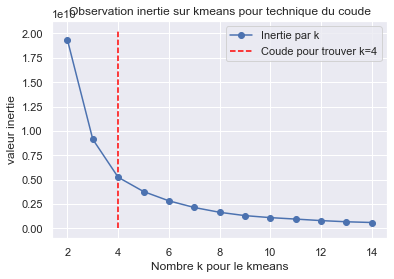

In [246]:
fig,ax=plt.subplots()
ax.plot(range(2,15),inertia,'o-',label='Inertie par k')
ax.set_xlabel('Nombre k pour le kmeans')
ax.set_ylabel('valeur inertie') 
ax.vlines(4,0,ax.get_ybound()[1], linestyles='dashed', colors='red',label='Coude pour trouver k=4')
plt.legend()
ax.set_title('Observation inertie sur kmeans pour technique du coude')
plt.show()

In [247]:
quatremeans=KMeans(n_clusters=4,random_state=0).fit(dfkm_train.values)

In [248]:
len(quatremeans.labels_)

131048

In [249]:
dfkm_train['classkM']=quatremeans.labels_.reshape(-1,1)

In [250]:
quatremeans.predict(dfkm.iloc[0].values.reshape(1,-1))

array([1])

In [251]:
ser=pd.Series(quatremeans.labels_,index=dfkm_train.index)
ser

1         1
2         1
3         1
7         3
12        1
         ..
320664    2
320665    2
320738    3
320742    3
320768    2
Length: 131048, dtype: int32

In [252]:
dfkm['classkM']=ser

In [253]:
dfkm.classkM.notna().sum()+dfkm.classkM.isna().sum()

190260

In [254]:
dfkm.iloc[0].values.reshape(1,-1)

array([[1.290e-03, 0.000e+00, 3.570e+00, 3.600e+00, 0.000e+00, 2.857e+01,
        6.429e+01, 2.243e+03, 1.000e+00]])

Text(0.5, 1.0, 'Distribution des 4 clusters Du Kmeans')

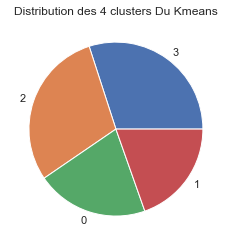

In [255]:
dfkm_train.classkM.value_counts().plot.pie()
plt.ylabel('')
plt.title('Distribution des 4 clusters Du Kmeans')

In [256]:
dfkm_train['nutrition_grade_fr']=df_['nutrition_grade_fr']

<AxesSubplot:xlabel='nutrition_grade_fr,classkM'>

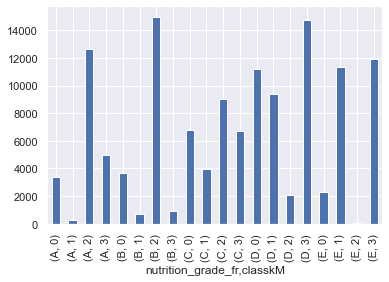

In [257]:
dfkm_train.groupby(['nutrition_grade_fr','classkM']).count()['iron_100g'].T.plot.bar()

In [260]:
dfkm_train[['nutrition_grade_fr','classkM']]

,nutrition_grade_fr,classkM
1,D,1
2,B,1
3,D,1
7,C,3
12,D,1
...,...,...
320664,C,2
320665,B,2
320738,D,3
320742,A,3


In [261]:
X = "nutrition_grade_fr"
Y = "classkM"

cont = dfkm_train[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

classkM,0,1,2,3,Total
nutrition_grade_fr,,,,,
A,3388,250,12647,4939,21224
B,3645,730,14982,956,20313
C,6808,3988,9001,6733,26530
D,11162,9365,2072,14765,37364
E,2318,11354,48,11897,25617
Total,27321,25687,38750,39290,131048


In [269]:
cont.iloc[:-1,:-1]

classkM,0,1,2,3
nutrition_grade_fr,,,,
A,3388,250,12647,4939
B,3645,730,14982,956
C,6808,3988,9001,6733
D,11162,9365,2072,14765
E,2318,11354,48,11897


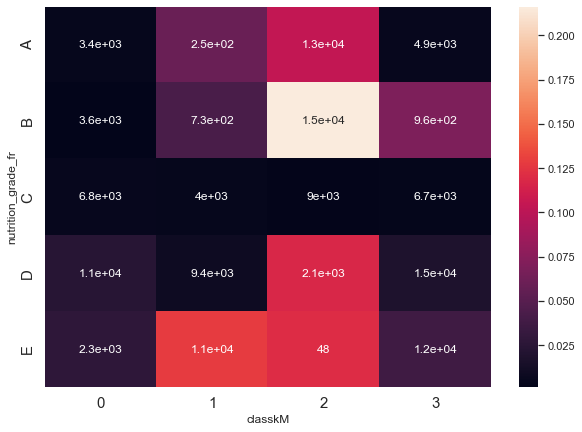

In [264]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(dfkm_train)
indep = tx.dot(ty) / n

measure = (cont.fillna(0)-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
plt.figure(figsize=(10,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.heatmap(table.iloc[:-1,:-1],annot=cont.fillna(0).iloc[:-1,:-1])
plt.show()

In [271]:
from scipy.stats import chi2_contingency


In [274]:
c, p, dof, expected = chi2_contingency(cont.iloc[:-1,:-1],correction=False) 
print('c vaut',c,'\n avec',dof,'deg de liberté \n et pvalue de',p)

c vaut 62065.052649115525 
 avec 12 deg de liberté 
 et pvalue de 0.0


In [273]:
expected

array([[ 4424.79781454,  4160.16183383,  6275.79207619,  6363.24827544],
       [ 4234.87174928,  3981.5947668 ,  6006.41558818,  6090.11789573],
       [ 5530.99726818,  5200.20229229,  7844.74009523,  7954.0603443 ],
       [ 7789.67892681,  7323.79790611, 11048.28001953, 11202.24314755],
       [ 5340.65424119,  5021.24320096,  7574.77222087,  7680.33033698]])

In [268]:
xi_n

62065.05264911553

In [311]:
dfkm_mean=dfkm_train.groupby('classkM').mean()

In [312]:
dfkm_mean

,iron_100g,sodium_100g,proteins_100g,fiber_100g,calcium_100g,fat_100g,carbohydrates_100g,energy_100g
classkM,,,,,,,,
0,0.002354,0.619218,8.654562,2.267301,0.098870,9.847065,29.310595,987.076109
1,0.003499,0.393488,10.271907,4.996022,0.079145,35.751817,46.747146,2256.420792
2,0.000901,0.506329,4.023243,1.282019,0.044115,1.634669,10.456820,296.728818
3,0.004973,0.527755,9.988238,3.493923,0.147549,12.765816,57.067177,1587.592359


In [313]:
for k in dfkm.iloc[0].index: print(k)

iron_100g
sodium_100g
proteins_100g
fiber_100g
calcium_100g
fat_100g
carbohydrates_100g
energy_100g
classkM


In [314]:
dfkm.iloc[0]['classkM']==np.nan

False

In [316]:
np.isnan(dfkm.iloc[0]['classkM'])

False

In [317]:
dfkm.iloc[-2].drop('classkM')

iron_100g               NaN
sodium_100g            0.01
proteins_100g          0.50
fiber_100g             0.20
calcium_100g            NaN
fat_100g               0.20
carbohydrates_100g     0.50
energy_100g           21.00
Name: 320763, dtype: float64

In [315]:
type(np.nan)

float

In [318]:
dfkm.iloc[-2][dfkm.iloc[-2].isna()]

iron_100g      NaN
calcium_100g   NaN
classkM        NaN
Name: 320763, dtype: float64

In [319]:
dfkm_mean

,iron_100g,sodium_100g,proteins_100g,fiber_100g,calcium_100g,fat_100g,carbohydrates_100g,energy_100g
classkM,,,,,,,,
0,0.002354,0.619218,8.654562,2.267301,0.098870,9.847065,29.310595,987.076109
1,0.003499,0.393488,10.271907,4.996022,0.079145,35.751817,46.747146,2256.420792
2,0.000901,0.506329,4.023243,1.282019,0.044115,1.634669,10.456820,296.728818
3,0.004973,0.527755,9.988238,3.493923,0.147549,12.765816,57.067177,1587.592359


In [326]:
def R_kmeans(s,d_kmmean=dfkm_mean,smean=df_r_tot_mean,kmean=quatremeans):
    if s.isna().mean()==0:
        return s
    elif s.isna().mean()==1:
        return s
    elif np.isnan(s['classkM']):
        s_=s.drop('classkM')
        l=s_[s_.isna()].index
        for k in l:
            s_[k]=smean[k]
        class_=kmean.predict(s_.values.reshape(1,-1))
        for j in l:
            s[j]=d_kmmean.loc[class_,j]
        s['classkM']=class_
        return s
    else: return s

In [327]:
start_time=time.time() 

dfkm.apply(R_kmeans,axis=1)

end_time=time.time() 
print("--- %s seconds ---" % (end_time - start_time),'\n Soit un total de --- %s minutes ---' % ((end_time - start_time)/60) )


--- 149.32007575035095 seconds --- 
 Soit un total de --- 2.488667929172516 minutes ---


In [ ]:
dfkm.isna().mean()

In [ ]:
dfkm[['nutrition_grade_fr','main_category_fr']]=df_[['nutrition_grade_fr','main_category_fr']].values
dfkm['ingrédients']=df.loc[df_.index,'ingredients_text'].values
dfkm['code']=df.loc[df_.index,'code'].values
dfkm['quantité']=df.loc[df_.index,'quantity'].values
dfkm.drop('classkM',axis=1,inplace=True)

In [ ]:
dfkm.to_csv('DF_KMEANS.csv')

In [ ]:
df[df['energy_100g'].notna()&df['generic_name'].notna()][['product_name','fiber_100g','sodium_100g','generic_name','energy_100g','quantity']].iloc[10000:10050]

In [ ]:
msno.heatmap(df.loc[df_.index,['main_category_fr','generic_name']])

In [ ]:
df.loc[df_.index,['main_category_fr','generic_name']].isna().sum()

In [ ]:
for k in df.columns: print(k)